In [142]:
from IPython.display import display, HTML
import warnings
warnings.filterwarnings('ignore')

# 데이터 전처리
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LassoCV, RidgeCV, ElasticNetCV
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction import DictVectorizer
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 시각화
import seaborn as sns
import matplotlib.pyplot as plt

In [143]:
import platform
platform.system()
# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정

%config InlineBackend.figure_format = 'retina'

In [144]:
import pandas as pd
import requests

consumer_key = '37808de2469e4a77961f'
consumer_secret = 'ca26b6be87d44342a9db'

url = f'https://sgisapi.kostat.go.kr/OpenAPI3/auth/authentication.json?consumer_key={consumer_key}&consumer_secret={consumer_secret}'
res = requests.get(url)
data= res.json()

accessToken = data['result']['accessToken']
accessToken

'adc9a0a2-c109-4c6e-a741-3d615e4f2725'

In [145]:
import pandas as pd

area_no = pd.read_excel('../nam/adm_code.xls')
area_no

,시도코드,시도명칭,시군구코드,시군구명칭,읍면동코드,읍면동명칭
0,11,서울특별시,10,종로구,530,사직동
1,11,서울특별시,10,종로구,540,삼청동
2,11,서울특별시,10,종로구,550,부암동
3,11,서울특별시,10,종로구,560,평창동
4,11,서울특별시,10,종로구,570,무악동
...,...,...,...,...,...,...
3523,39,제주특별자치도,20,서귀포시,580,서홍동
3524,39,제주특별자치도,20,서귀포시,590,대륜동
3525,39,제주특별자치도,20,서귀포시,600,대천동
3526,39,제주특별자치도,20,서귀포시,610,중문동


In [146]:
goo_list = []
dong_list = []
area_no_list = []
for i in range(0, 426):
    area_no_list.append(area_no.iloc[i][0] * 1000000 + area_no.iloc[i][2] * 1000 + area_no.iloc[i][4])
    goo_list.append(area_no.iloc[i][3])
    dong_list.append(area_no.iloc[i][5])
print(area_no_list)
print(goo_list)
print(dong_list)
unique_goo_list = list(set(goo_list))

[11010530, 11010540, 11010550, 11010560, 11010570, 11010580, 11010600, 11010610, 11010630, 11010640, 11010670, 11010680, 11010690, 11010700, 11010710, 11010720, 11010730, 11020520, 11020540, 11020550, 11020570, 11020580, 11020590, 11020600, 11020650, 11020670, 11020680, 11020690, 11020700, 11020710, 11020720, 11020730, 11030510, 11030520, 11030530, 11030570, 11030580, 11030590, 11030630, 11030640, 11030650, 11030660, 11030690, 11030700, 11030710, 11030720, 11030730, 11030740, 11040520, 11040540, 11040550, 11040560, 11040570, 11040580, 11040590, 11040620, 11040650, 11040660, 11040670, 11040680, 11040690, 11040700, 11040710, 11040720, 11040730, 11050530, 11050540, 11050550, 11050560, 11050570, 11050580, 11050590, 11050600, 11050610, 11050620, 11050630, 11050640, 11050650, 11050660, 11050670, 11060710, 11060720, 11060730, 11060800, 11060810, 11060820, 11060830, 11060840, 11060860, 11060870, 11060880, 11060890, 11060900, 11060910, 11070520, 11070540, 11070550, 11070570, 11070590, 11070600,

In [147]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 제거

# 인구수

In [148]:
# 인구수 데이터 가져오기
import requests

year = 2022
population = pd.DataFrame(columns=['행정동 코드', '행정구역명', '인구수', '평균나이'])

for adm_cd in area_no_list:
    population_url = f'https://sgisapi.kostat.go.kr/OpenAPI3/stats/searchpopulation.json?year={year}&adm_cd={adm_cd}&accessToken={accessToken}'
    # Add headers if needed
    headers = {'Content-Type': 'application/json'}
    res = requests.get(population_url, headers=headers)
    
    if res.status_code != 200:
        print(f"Error: {res.status_code}")
        continue

    data = res.json()
    if 'result' in data:
        items = data['result']
        df = pd.DataFrame(items).rename(columns={'adm_cd' : '행정동 코드', 'adm_nm':'행정구역명', 'population':'인구수', 'avg_age':'평균나이'})
        # population = population.append(df, ignore_index=True)
        population = pd.concat([population, df], ignore_index=True)

population['인구수'] = population['인구수'].astype(int)
df_p = population[['행정구역명', '인구수']]
df_goo = pd.DataFrame(goo_list).rename(columns={0:'소속구'})
df_p = pd.concat([df_goo, df_p], axis=1)
df_p = df_p.groupby('소속구').sum()
df_p = df_p.reset_index()
df_p = df_p.drop(df_p.columns[1], axis=1)
df_p

,소속구,인구수
0,강남구,487153
1,강동구,438900
2,강북구,279828
3,강서구,543655
4,관악구,470221
5,광진구,324047
6,구로구,378227
7,금천구,220466
8,노원구,486285
9,도봉구,298358


In [149]:
# 사업체수, 종사자수 데이터 가져오기
import requests

year = 2021
company = pd.DataFrame(columns=['행정동 코드', '행정구역명', '사업체수(개)', '종사자수(명)'])

for adm_cd in area_no_list:
    company_url = f'https://sgisapi.kostat.go.kr/OpenAPI3/stats/company.json?year={year}&adm_cd={adm_cd}&accessToken={accessToken}'
    headers = {'Content-Type': 'application/json'}

    res = requests.get(company_url, headers=headers)

    data = res.json()
    items = data['result']
    df = pd.DataFrame(items).rename(columns={'adm_cd' : '행정동 코드', 'adm_nm':'행정구역명', 'corp_cnt':'사업체수(개)', 'tot_worker':'종사자수(명)'})
    # company = company.append(df, ignore_index=True)
    company = pd.concat([company, df], ignore_index=True)
company['사업체수(개)'] = company['사업체수(개)'].astype(int)
company['종사자수(명)'] = company['종사자수(명)'].astype(int)
df_goo = pd.DataFrame(goo_list).rename(columns={0:'소속구'})
df_company = company[['행정구역명', '사업체수(개)', '종사자수(명)']].head(426)
df_company = pd.concat([df_goo, df_company], axis=1)
df_company = df_company.groupby('소속구').sum()
df_company = df_company.reset_index()
df_company

,소속구,행정구역명,사업체수(개),종사자수(명)
0,강남구,신사동개포3동논현1동논현2동삼성1동삼성2동대치1동대치4동역삼1동역삼2동도곡1동도곡2...,108512,800269
1,강동구,명일1동명일2동고덕1동고덕2동암사2동암사3동천호1동천호3동성내1동성내2동성내3동둔촌...,37242,153049
2,강북구,번1동번2동번3동수유1동수유2동수유3동삼양동미아동송중동송천동삼각산동우이동인수동,23706,77529
3,강서구,염창동등촌1동등촌2동등촌3동화곡본동화곡2동화곡3동화곡4동화곡6동화곡8동가양1동가양2...,52865,283547
4,관악구,보라매동청림동행운동낙성대동중앙동인헌동남현동서원동신원동서림동신사동신림동난향동조원동대학...,34064,124560
5,광진구,화양동군자동중곡1동중곡2동중곡3동중곡4동능동구의1동구의2동구의3동광장동자양1동자양2...,31751,127761
6,구로구,신도림동구로1동구로3동구로4동구로5동고척1동고척2동개봉2동개봉3동오류1동수궁동가리봉...,48818,236487
7,금천구,가산동독산1동독산2동독산3동독산4동시흥1동시흥2동시흥3동시흥4동시흥5동,45848,253100
8,노원구,월계1동월계2동월계3동공릉2동하계1동하계2동중계본동중계1동중계4동상계1동상계2동상계...,32069,127564
9,도봉구,쌍문1동쌍문2동쌍문3동쌍문4동방학1동방학2동방학3동창1동창2동창3동창4동창5동도봉1...,20746,74516


# 사업체수

In [150]:
df_bussiness = df_company.drop(['종사자수(명)', '행정구역명'], axis=1)
df_bussiness

,소속구,사업체수(개)
0,강남구,108512
1,강동구,37242
2,강북구,23706
3,강서구,52865
4,관악구,34064
5,광진구,31751
6,구로구,48818
7,금천구,45848
8,노원구,32069
9,도봉구,20746


# 종사자수

In [151]:
df_worker = df_company.drop(['사업체수(개)', '행정구역명'], axis=1)
df_worker

,소속구,종사자수(명)
0,강남구,800269
1,강동구,153049
2,강북구,77529
3,강서구,283547
4,관악구,124560
5,광진구,127761
6,구로구,236487
7,금천구,253100
8,노원구,127564
9,도봉구,74516


# 자동차 등록대수

In [152]:
# 자동차 등록대수 데이터 가져오기
register_car = pd.read_excel('../nam/car.xlsx')
register_car = register_car.rename(columns={'시군구':'소속구', '총계':'자동차 등록대수'})
register_car = register_car.drop(['시도명', '승용','승합','화물','특수'], axis=1)
# register_car[['소속구', '자동차 등록대수']]
register_car

,소속구,자동차 등록대수
0,강남구,253856
1,강동구,154020
2,강북구,74549
3,강서구,205821
4,관악구,118303
5,광진구,97627
6,구로구,147818
7,금천구,92139
8,노원구,152510
9,도봉구,95127


# 역 개수

In [153]:
# 역 개수 데이터 가져오기
num_subway = pd.read_csv('../nam/num_subway.CSV', encoding='cp949')
num_subway_df = pd.DataFrame(num_subway)
num_subway_df = num_subway_df.rename(columns={'자치구':'소속구', '역개수':'지하철역 개수'})
num_subway_df = num_subway_df.drop(['해당역(호선)'], axis=1)
# num_subway_df[['소속구', '역개수']]
num_subway_df

,소속구,지하철역 개수
0,강남구,21
1,강동구,14
2,강북구,3
3,강서구,9
4,관악구,4
5,광진구,11
6,구로구,7
7,금천구,1
8,노원구,13
9,도봉구,3


# 대학교 개수

In [154]:
# 대학교 개수 데이터 가져오기
num_college = pd.read_excel('../nam/num_college.xlsx')
num_college_df = pd.DataFrame(num_college)
count_college = num_college_df.groupby('행정구').count()
count_college = count_college[['대학교']].reset_index()
count_college = count_college.rename(columns={'행정구':'소속구'})
count_college


,소속구,대학교
0,강남구,1
1,강북구,1
2,강서구,2
3,관악구,1
4,광진구,3
5,구로구,3
6,노원구,7
7,도봉구,1
8,동대문구,5
9,동작구,3


# 시간대별 지하철 이용객 수

In [155]:
# 시간대별 지하철 이용객 수 데이터 가져오기
subway_use = pd.read_csv('../nam/subway_use.csv')
subway_use_df = pd.DataFrame(subway_use)

all_count_subway_use = subway_use_df.groupby(['지역', '시간대'], as_index=False)['시간대별하루평균(명)'].sum()
df_subway_use = all_count_subway_use.reset_index().drop(['index'], axis=1)
df_subway_use['지역'] = df_subway_use['지역'].str.replace('서울특별시 ', '')
df_subway_use

,지역,시간대,시간대별하루평균(명)
0,강남구,08-09시 평균,112738
1,강남구,12-13시 평균,53721
2,강남구,18-19시 평균,127164
3,강남구,20-21시 평균,52050
4,강남구,시간당 평균,56658
...,...,...,...
120,중랑구,08-09시 평균,19963
121,중랑구,12-13시 평균,9625
122,중랑구,18-19시 평균,17867
123,중랑구,20-21시 평균,9045


In [156]:
c_url = f'https://viewt.ktdb.go.kr/cong/api/basedPathOD_sgg2sgg.do?&ZONEID=1101000&YEAR=2021&WEEKTYPE=0&TIME=all'
res = requests.get(c_url)
data = res.json()
items = data['RESULT']
zone_info_list = [{'ZONEID': int(item['ZONEID']), 'ZONENAME': item['ZONENAME']} for item in items][:25]
zone_info_list

[{'ZONEID': 1101000, 'ZONENAME': '서울특별시 종로구'},
 {'ZONEID': 1102000, 'ZONENAME': '서울특별시 중구'},
 {'ZONEID': 1103000, 'ZONENAME': '서울특별시 용산구'},
 {'ZONEID': 1104000, 'ZONENAME': '서울특별시 성동구'},
 {'ZONEID': 1105000, 'ZONENAME': '서울특별시 광진구'},
 {'ZONEID': 1106000, 'ZONENAME': '서울특별시 동대문구'},
 {'ZONEID': 1107000, 'ZONENAME': '서울특별시 중랑구'},
 {'ZONEID': 1108000, 'ZONENAME': '서울특별시 성북구'},
 {'ZONEID': 1109000, 'ZONENAME': '서울특별시 강북구'},
 {'ZONEID': 1110000, 'ZONENAME': '서울특별시 도봉구'},
 {'ZONEID': 1111000, 'ZONENAME': '서울특별시 노원구'},
 {'ZONEID': 1112000, 'ZONENAME': '서울특별시 은평구'},
 {'ZONEID': 1113000, 'ZONENAME': '서울특별시 서대문구'},
 {'ZONEID': 1114000, 'ZONENAME': '서울특별시 마포구'},
 {'ZONEID': 1115000, 'ZONENAME': '서울특별시 양천구'},
 {'ZONEID': 1116000, 'ZONENAME': '서울특별시 강서구'},
 {'ZONEID': 1117000, 'ZONENAME': '서울특별시 구로구'},
 {'ZONEID': 1118000, 'ZONENAME': '서울특별시 금천구'},
 {'ZONEID': 1119000, 'ZONENAME': '서울특별시 영등포구'},
 {'ZONEID': 1120000, 'ZONENAME': '서울특별시 동작구'},
 {'ZONEID': 1121000, 'ZONENAME': '서울특별시 관악구'},
 {'ZONEID':

In [157]:
df_subway_use = df_subway_use[df_subway_use['시간대'] == '시간당 평균']
df_subway_use = df_subway_use.drop('시간대', axis=1)
df_subway_use = df_subway_use.reset_index(drop=True)
df_subway_use = df_subway_use.rename(columns={'지역':'소속구', '시간대별하루평균(명)':'시간당 평균 지하철 이용객 수'})
df_subway_use

,소속구,시간당 평균 지하철 이용객 수
0,강남구,56658
1,강동구,14479
2,강북구,9398
3,강서구,25904
4,관악구,15447
5,광진구,17936
6,구로구,22006
7,금천구,7439
8,노원구,18645
9,도봉구,8198


# 지역별 자동차 이용량

In [158]:
# 지역별 자동차 이동량 데이터 가져오기
in_out_count = []
for ZONEID, i in zip(range(1101000, 1125001, 1000), range(0,25)):
    IN = 0
    OUT = 0
    for item in zone_info_list:
        if item['ZONEID'] == ZONEID:
            start_zone = item['ZONENAME']
    car_move_url = f'https://viewt.ktdb.go.kr/cong/api/basedPathOD_sgg2sgg.do?&ZONEID={ZONEID}&YEAR=2021&WEEKTYPE=0&TIME=all'
    res = requests.get(car_move_url)
    data = res.json()
    items = data['RESULT']
    
    in_out_list = [{'ZONEID': int(item['ZONEID']), 'ZONENAME': item['ZONENAME'], 'VALUE' : item['VALUE']} for item in items]
    for item in in_out_list:
        IN += item['VALUE']['IN']
        OUT += item['VALUE']['OUT']
    in_out_count.append({'ZONEID': ZONEID, 'ZONENAME': start_zone, 'IN': IN, 'OUT': OUT})
    
df_in_out_count = pd.DataFrame(in_out_count)
df_in_out_count = df_in_out_count[['ZONENAME', 'IN', 'OUT']].rename(columns={'ZONENAME': '지역'})
df_in_count = df_in_out_count[['지역', 'IN']]
df_out_count = df_in_out_count[['지역', 'OUT']]

In [159]:
df_in_count['지역'] = df_in_count['지역'].str.replace('서울특별시 ', '')
df_in_count = df_in_count.sort_values(by=['지역'])
df_in_count = df_in_count.reset_index(drop=True)
df_in_count = df_in_count.rename(columns={'지역':'소속구','IN':'지역별 자동차 이동량(IN)'})
df_in_count

,소속구,지역별 자동차 이동량(IN)
0,강남구,476930
1,강동구,189777
2,강북구,81393
3,강서구,258611
4,관악구,155379
5,광진구,148779
6,구로구,148435
7,금천구,107555
8,노원구,173485
9,도봉구,83870


In [179]:
df_out_count['지역'] = df_out_count['지역'].str.replace('서울특별시 ', '')
df_out_count = df_out_count.sort_values(by=['지역'])
df_out_count = df_out_count.reset_index(drop=True)
df_out_count = df_out_count.rename(columns={'지역':'소속구','OUT':'지역별 자동차 이동량(OUT)'})
df_out_count

,소속구,지역별 자동차 이동량(OUT)
0,강남구,503086
1,강동구,184318
2,강북구,70290
3,강서구,252385
4,관악구,145935
5,광진구,150575
6,구로구,148427
7,금천구,105833
8,노원구,179853
9,도봉구,75120


# 지역별 학생 수

In [160]:
high_num = pd.read_csv('../nam/high_num.csv')
high_num_df = pd.DataFrame(high_num).iloc[1:26, [2,7]]
high_num_df['지역'] = high_num_df['지역'].str.replace('서울특별시 ', '')
high_num_df = high_num_df.reset_index(drop=True)
high_num_df = high_num_df.rename(columns={'지역':'소속구', '학생(명)':'고등학생 수'})
high_num_df

,소속구,고등학생 수
0,강남구,17403
1,강동구,10839
2,강북구,5120
3,강서구,13149
4,관악구,8478
5,광진구,7253
6,구로구,8817
7,금천구,3726
8,노원구,17140
9,도봉구,5906


In [161]:
middle_num = pd.read_csv('../nam/middle_num.csv')
middle_num_df = pd.DataFrame(middle_num).iloc[1:26, [2,7]]
middle_num_df['지역'] = middle_num_df['지역'].str.replace('서울특별시 ', '')
middle_num_df = middle_num_df.reset_index(drop=True)
middle_num_df = middle_num_df.rename(columns={'지역':'소속구', '학생(명)':'중학생 수'})
middle_num_df

,소속구,중학생 수
0,강남구,16500
1,강동구,10946
2,강북구,5696
3,강서구,10312
4,관악구,6314
5,광진구,6674
6,구로구,7889
7,금천구,3631
8,노원구,13782
9,도봉구,5839


In [195]:
uni_num = pd.read_excel('../nam/uni_num.xlsx')
uni_num_df = pd.DataFrame(uni_num).iloc[1:, :2]
uni_num_df = uni_num_df.rename(columns={'행정구역별':'행정구', '2023' :'대학생수'})
uni_num_df = uni_num_df.sort_values(by=['행정구'])
uni_num_df = uni_num_df.reset_index(drop=True)
uni_num_df = uni_num_df.rename(columns={'행정구':'소속구'})
uni_num_df['소속구'] = uni_num_df['소속구'].str.strip()
uni_num_df

,소속구,대학생수
0,강북구,3151
1,강서구,2479
2,관악구,20507
3,광진구,39461
4,구로구,13398
5,노원구,50403
6,도봉구,6507
7,동대문구,44252
8,동작구,46426
9,마포구,28571


# 지역별 면적

In [229]:
goo_info = pd.read_excel('../nam/goo_info.xlsx')
goo_info_df = pd.DataFrame(goo_info).iloc[2:, 1:3]
goo_info_df = goo_info_df.rename(columns={'자치구별(2)': '소속구', '2022' : '면적'})
goo_info_df = goo_info_df.reset_index(drop=True)
goo_info_df = goo_info_df.drop([0])
goo_info_df = goo_info_df.sort_values(by=['소속구'])
goo_info_df = goo_info_df.reset_index(drop=True)
goo_info_df['면적'] = pd.to_numeric(goo_info_df['면적'], errors='coerce')
goo_info_df

,소속구,면적
0,강남구,39.50
1,강동구,24.59
2,강북구,23.60
3,강서구,41.45
4,관악구,29.57
5,광진구,17.06
6,구로구,20.12
7,금천구,13.02
8,노원구,35.44
9,도봉구,20.65


In [230]:
traffic_user = pd.read_csv('../nam/trafic_user.csv')
traffic_user_df = pd.DataFrame(traffic_user)

traffic_user_df = traffic_user_df.groupby(['지역', '항목'])['월 총(명)'].mean().reset_index()
bus_user_df = traffic_user_df[traffic_user_df['항목'] == '버스']
subway_user_df = traffic_user_df[traffic_user_df['항목'] == '지하철']
bus_user_df = bus_user_df.drop('항목', axis=1)
subway_user_df = subway_user_df.drop('항목', axis=1)
subway_user_df = subway_user_df.reset_index(drop=True)
bus_user_df = bus_user_df.reset_index(drop=True)
bus_user_df = bus_user_df.rename(columns={'지역':'소속구', '월 총(명)':'월 총 버스 이용객 수'})
subway_user_df = subway_user_df.rename(columns={'지역':'소속구', '월 총(명)':'월 총 지하철 이용객 수'})
bus_user_df

,소속구,월 총 버스 이용객 수
0,강남구,1.717323e+07
1,강동구,5.955631e+06
2,강북구,9.742048e+06
3,강서구,9.476828e+06
4,관악구,1.511914e+07
5,광진구,5.807374e+06
6,구로구,1.026499e+07
7,금천구,7.421641e+06
8,노원구,8.635064e+06
9,도봉구,6.705999e+06


In [231]:
subway_user_df

,소속구,월 총 지하철 이용객 수
0,강남구,3.584361e+07
1,강동구,9.013447e+06
2,강북구,5.966186e+06
3,강서구,1.438899e+07
4,관악구,9.950634e+06
5,광진구,1.141278e+07
6,구로구,1.357861e+07
7,금천구,4.890644e+06
8,노원구,1.152272e+07
9,도봉구,5.229198e+06


In [333]:
# df_all = df_p.merge(df_bussiness, on='소속구', how='outer').merge(df_worker, on='소속구', how='outer').merge(register_car, on='소속구', how='outer').merge(num_subway_df, on='소속구', how='outer').merge(count_college, on='소속구', how='outer').merge(df_subway_use, on='소속구', how='outer').merge(df_in_count, on='소속구', how='outer').merge(df_out_count, on='소속구', how='outer').merge(high_num_df, on='소속구', how='outer').merge(middle_num_df, on='소속구', how='outer').merge(uni_num_df, on='소속구', how='outer').merge(goo_info_df, on='소속구', how='outer').merge(bus_user_df, on='소속구', how='outer').merge(num_subway_df, on='소속구', how='outer')
df_all = df_p.merge(df_bussiness, on='소속구', how='outer').merge(df_worker, on='소속구', how='outer').merge(register_car, on='소속구', how='outer')
df_all = df_all.merge(num_subway_df, on='소속구', how='outer').merge(count_college, on='소속구', how='outer').merge(df_subway_use, on='소속구', how='outer').merge(df_in_count, on='소속구', how='outer')
df_all = df_all.merge(df_out_count, on='소속구', how='outer').merge(high_num_df, on='소속구', how='outer').merge(middle_num_df, on='소속구', how='outer')
df_all = df_all.merge(uni_num_df, on='소속구', how='outer').merge(goo_info_df, on='소속구', how='outer').merge(bus_user_df, on='소속구', how='outer').merge(subway_user_df, on='소속구', how='outer')
df_all


,소속구,인구수,사업체수(개),종사자수(명),자동차 등록대수,지하철역 개수,대학교,시간당 평균 지하철 이용객 수,지역별 자동차 이동량(IN),지역별 자동차 이동량(OUT),고등학생 수,중학생 수,대학생수,면적,월 총 버스 이용객 수,월 총 지하철 이용객 수
0,강남구,487153,108512,800269,253856,21,1.0,56658,476930,503086,17403,16500,NaN,39.50,1.717323e+07,3.584361e+07
1,강동구,438900,37242,153049,154020,14,NaN,14479,189777,184318,10839,10946,NaN,24.59,5.955631e+06,9.013447e+06
2,강북구,279828,23706,77529,74549,3,1.0,9398,81393,70290,5120,5696,3151,23.60,9.742048e+06,5.966186e+06
3,강서구,543655,52865,283547,205821,9,2.0,25904,258611,252385,13149,10312,2479,41.45,9.476828e+06,1.438899e+07
4,관악구,470221,34064,124560,118303,4,1.0,15447,155379,145935,8478,6314,20507,29.57,1.511914e+07,9.950634e+06
5,광진구,324047,31751,127761,97627,11,3.0,17936,148779,150575,7253,6674,39461,17.06,5.807374e+06,1.141278e+07
6,구로구,378227,48818,236487,147818,7,3.0,22006,148435,148427,8817,7889,13398,20.12,1.026499e+07,1.357861e+07
7,금천구,220466,45848,253100,92139,1,NaN,7439,107555,105833,3726,3631,NaN,13.02,7.421641e+06,4.890644e+06
8,노원구,486285,32069,127564,152510,13,7.0,18645,173485,179853,17140,13782,50403,35.44,8.635064e+06,1.152272e+07
9,도봉구,298358,20746,74516,95127,3,1.0,8198,83870,75120,5906,5839,6507,20.65,6.705999e+06,5.229198e+06


# Lasso 전처리

In [334]:
print(f'관측치 수 : {df_all.shape[0]} \n변수 수 : {df_all.shape[1]}')

관측치 수 : 25 
변수 수 : 16


In [335]:
df_all.info()
df_all.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   소속구               25 non-null     object 
 1   인구수               25 non-null     int64  
 2   사업체수(개)           25 non-null     int64  
 3   종사자수(명)           25 non-null     int64  
 4   자동차 등록대수          25 non-null     int64  
 5   지하철역 개수           25 non-null     int64  
 6   대학교               21 non-null     float64
 7   시간당 평균 지하철 이용객 수  25 non-null     int64  
 8   지역별 자동차 이동량(IN)   25 non-null     int64  
 9   지역별 자동차 이동량(OUT)  25 non-null     int64  
 10  고등학생 수            25 non-null     int64  
 11  중학생 수             25 non-null     int64  
 12  대학생수              20 non-null     object 
 13  면적                25 non-null     float64
 14  월 총 버스 이용객 수      25 non-null     float64
 15  월 총 지하철 이용객 수     25 non-null     float64
dtypes: float64(4), int64(10), object(2)
memory usa

,인구수,사업체수(개),종사자수(명),자동차 등록대수,지하철역 개수,대학교,시간당 평균 지하철 이용객 수,지역별 자동차 이동량(IN),지역별 자동차 이동량(OUT),고등학생 수,중학생 수,면적,월 총 버스 이용객 수,월 총 지하철 이용객 수
count,25.000000,25.000000,25.00000,25.000000,25.000000,21.000000,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000,2.500000e+01,2.500000e+01
mean,359448.520000,44491.920000,227805.68000,127646.480000,10.920000,3.047619,19952.200000,182949.640000,184653.240000,8231.36000,7945.920000,24.208800,1.007100e+07,1.240977e+07
std,120563.571386,20420.429584,167360.24385,51622.618728,6.486653,2.376472,11601.913556,95294.897175,101283.890135,3970.51957,4128.112613,9.311872,2.851302e+06,7.219934e+06
min,112440.000000,20746.000000,74516.00000,50768.000000,1.000000,1.000000,6538.000000,81393.000000,70290.000000,3648.00000,1565.000000,9.960000,5.807374e+06,2.929360e+06
25%,298358.000000,31751.000000,120972.00000,95127.000000,6.000000,1.000000,11835.000000,121025.000000,122001.000000,5260.00000,5756.000000,17.410000,8.098203e+06,7.455709e+06
50%,368421.000000,37242.000000,151839.00000,118303.000000,11.000000,2.000000,17936.000000,148779.000000,148427.000000,7253.00000,6674.000000,23.600000,1.014744e+07,1.139634e+07
75%,438900.000000,52865.000000,277732.00000,151409.000000,14.000000,3.000000,25904.000000,189777.000000,199072.000000,10839.00000,10312.000000,29.570000,1.161241e+07,1.553619e+07
max,621266.000000,108512.000000,800269.00000,253856.000000,28.000000,9.000000,56658.000000,476930.000000,503086.000000,17403.00000,16500.000000,46.970000,1.717323e+07,3.584361e+07


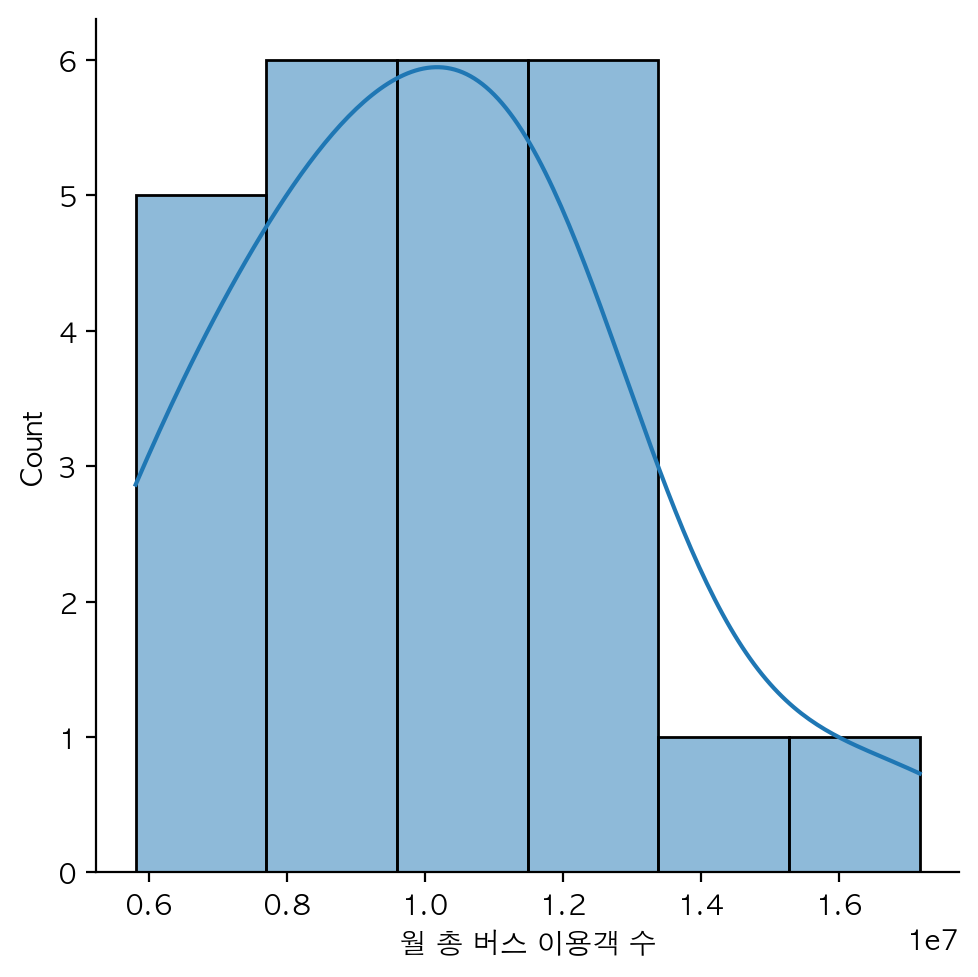

In [336]:
f = sns.displot(df_all['월 총 버스 이용객 수'], kde=True)

In [337]:
X = df_all.drop('월 총 버스 이용객 수', axis=1)
y = df_all['월 총 버스 이용객 수']

display(X.head(3))

,소속구,인구수,사업체수(개),종사자수(명),자동차 등록대수,지하철역 개수,대학교,시간당 평균 지하철 이용객 수,지역별 자동차 이동량(IN),지역별 자동차 이동량(OUT),고등학생 수,중학생 수,대학생수,면적,월 총 지하철 이용객 수
0,강남구,487153,108512,800269,253856,21,1.0,56658,476930,503086,17403,16500,NaN,39.50,3.584361e+07
1,강동구,438900,37242,153049,154020,14,NaN,14479,189777,184318,10839,10946,NaN,24.59,9.013447e+06
2,강북구,279828,23706,77529,74549,3,1.0,9398,81393,70290,5120,5696,3151,23.60,5.966186e+06


In [338]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2021)

In [339]:
NaNinfo = X_train.isnull().sum()
NaNinfo = NaNinfo.sort_values(ascending = False)
NaNinfo = NaNinfo[NaNinfo > 0]
NaNinfo

대학생수    5
대학교     4
dtype: int64

In [340]:
for col in NaNinfo.index:
    print(f'{col} : {df_all[col].unique().tolist()[:10]}')

대학생수 : [nan, 3151, 2479, 20507, 39461, 13398, 50403, 6507, 44252, 46426]
대학교 : [1.0, nan, 2.0, 3.0, 7.0, 5.0, 9.0, 6.0]


In [341]:
for feature in ['대학생수', '대학교']:
    X_train[feature] = X_train[feature].fillna(X_train[feature].mean())
    X_test[feature] = X_test[feature].fillna(X_train[feature].mean())

In [342]:
category = list(X_train.select_dtypes(include = [object]))
category[:10]

['소속구']

In [343]:
X_train = X_train.set_index('소속구')
X_train

,인구수,사업체수(개),종사자수(명),자동차 등록대수,지하철역 개수,대학교,시간당 평균 지하철 이용객 수,지역별 자동차 이동량(IN),지역별 자동차 이동량(OUT),고등학생 수,중학생 수,대학생수,면적,월 총 지하철 이용객 수
소속구,,,,,,,,,,,,,,
종로구,133947,47580,275007,50768,15,6.000000,28891,113175,121313,7365,2481,27338.000000,23.91,1.781277e+07
강북구,279828,23706,77529,74549,3,1.000000,9398,81393,70290,5120,5696,3151.000000,23.60,5.966186e+06
서초구,373217,71228,487149,177103,12,3.000000,24763,335622,346825,9342,11538,2464.000000,46.97,1.553619e+07
영등포구,356314,71666,431292,144663,11,2.769231,26215,295161,301272,5467,6257,19500.083333,24.55,1.710700e+07
성동구,269462,39582,200788,104416,14,2.000000,18358,147239,150923,3648,4339,30114.000000,16.82,1.139634e+07
금천구,220466,45848,253100,92139,1,2.769231,7439,107555,105833,3726,3631,19500.083333,13.02,4.890644e+06
광진구,324047,31751,127761,97627,11,3.000000,17936,148779,150575,7253,6674,39461.000000,17.06,1.141278e+07
강동구,438900,37242,153049,154020,14,2.769231,14479,189777,184318,10839,10946,19500.083333,24.59,9.013447e+06
송파구,621266,69561,395719,244299,28,1.000000,31385,360946,368371,13735,15971,2992.000000,33.88,1.908248e+07


In [344]:
X_test = X_test.set_index('소속구')
X_test

,인구수,사업체수(개),종사자수(명),자동차 등록대수,지하철역 개수,대학교,시간당 평균 지하철 이용객 수,지역별 자동차 이동량(IN),지역별 자동차 이동량(OUT),고등학생 수,중학생 수,대학생수,면적,월 총 지하철 이용객 수
소속구,,,,,,,,,,,,,,
중구,112440,69812,387438,54772,23,2.0,41201,121025,119206,5260,1565,20545,9.96,2.280708e+07
성북구,417706,31668,120972,122505,9,7.0,11835,154569,147739,7582,8814,81492,24.58,7.455709e+06
동대문구,326202,39739,143293,102637,6,5.0,12926,126704,125840,6145,6130,44252,14.22,8.146486e+06
관악구,470221,34064,124560,118303,4,1.0,15447,155379,145935,8478,6314,20507,29.57,9.950634e+06
도봉구,298358,20746,74516,95127,3,1.0,8198,83870,75120,5906,5839,6507,20.65,5.229198e+06
노원구,486285,32069,127564,152510,13,7.0,18645,173485,179853,17140,13782,50403,35.44,1.152272e+07
동작구,368421,26034,107393,106496,12,3.0,24270,114097,122001,5244,6950,46426,16.36,1.515848e+07
강서구,543655,52865,283547,205821,9,2.0,25904,258611,252385,13149,10312,2479,41.45,1.438899e+07


In [345]:
y_test

23    8.098203e+06
16    1.323502e+07
10    1.109789e+07
4     1.511914e+07
9     6.705999e+06
8     8.635064e+06
11    1.014744e+07
3     9.476828e+06
Name: 월 총 버스 이용객 수, dtype: float64

In [346]:
X_train_final = X_train
X_test_final = X_test

In [347]:
X_train, y_train = X_train.values, y_train.values
X_test, y_test = X_test.values, y_test.values

In [348]:
X_train

array([[1.33947000e+05, 4.75800000e+04, 2.75007000e+05, 5.07680000e+04,
        1.50000000e+01, 6.00000000e+00, 2.88910000e+04, 1.13175000e+05,
        1.21313000e+05, 7.36500000e+03, 2.48100000e+03, 2.73380000e+04,
        2.39100000e+01, 1.78127702e+07],
       [2.79828000e+05, 2.37060000e+04, 7.75290000e+04, 7.45490000e+04,
        3.00000000e+00, 1.00000000e+00, 9.39800000e+03, 8.13930000e+04,
        7.02900000e+04, 5.12000000e+03, 5.69600000e+03, 3.15100000e+03,
        2.36000000e+01, 5.96618600e+06],
       [3.73217000e+05, 7.12280000e+04, 4.87149000e+05, 1.77103000e+05,
        1.20000000e+01, 3.00000000e+00, 2.47630000e+04, 3.35622000e+05,
        3.46825000e+05, 9.34200000e+03, 1.15380000e+04, 2.46400000e+03,
        4.69700000e+01, 1.55361907e+07],
       [3.56314000e+05, 7.16660000e+04, 4.31292000e+05, 1.44663000e+05,
        1.10000000e+01, 2.76923077e+00, 2.62150000e+04, 2.95161000e+05,
        3.01272000e+05, 5.46700000e+03, 6.25700000e+03, 1.95000833e+04,
        2.455

In [349]:
# 모델 학습
model_LR = LinearRegression(n_jobs = -1)
model_LR.fit(X_train, y_train)

# 계수 출력
display(pd.DataFrame(model_LR.coef_,
    index = X_test_final.columns, columns = ['Linear regression 계수']))

,Linear regression 계수
인구수,1.201040e+02
사업체수(개),-9.719732e+02
종사자수(명),1.419687e+02
자동차 등록대수,-1.663932e+02
지하철역 개수,-1.862856e+05
대학교,2.057999e+06
시간당 평균 지하철 이용객 수,-1.046772e+02
지역별 자동차 이동량(IN),-3.266698e+02
지역별 자동차 이동량(OUT),3.012812e+02
고등학생 수,-4.964132e+02


In [350]:
model_Lasso1 = Lasso(alpha = 0.0001, random_state = 1)
model_Lasso2 = Lasso(alpha = 100.0, random_state = 1)
model_Ridge1 = Ridge(alpha = 0.0001, random_state = 1)
model_Ridge2 = Ridge(alpha = 100.0, random_state = 1)

model_Lasso1.fit(X_train, y_train)
model_Lasso2.fit(X_train, y_train)
model_Ridge1.fit(X_train, y_train)
model_Ridge2.fit(X_train, y_train)

Ridge(alpha=100.0, random_state=1)

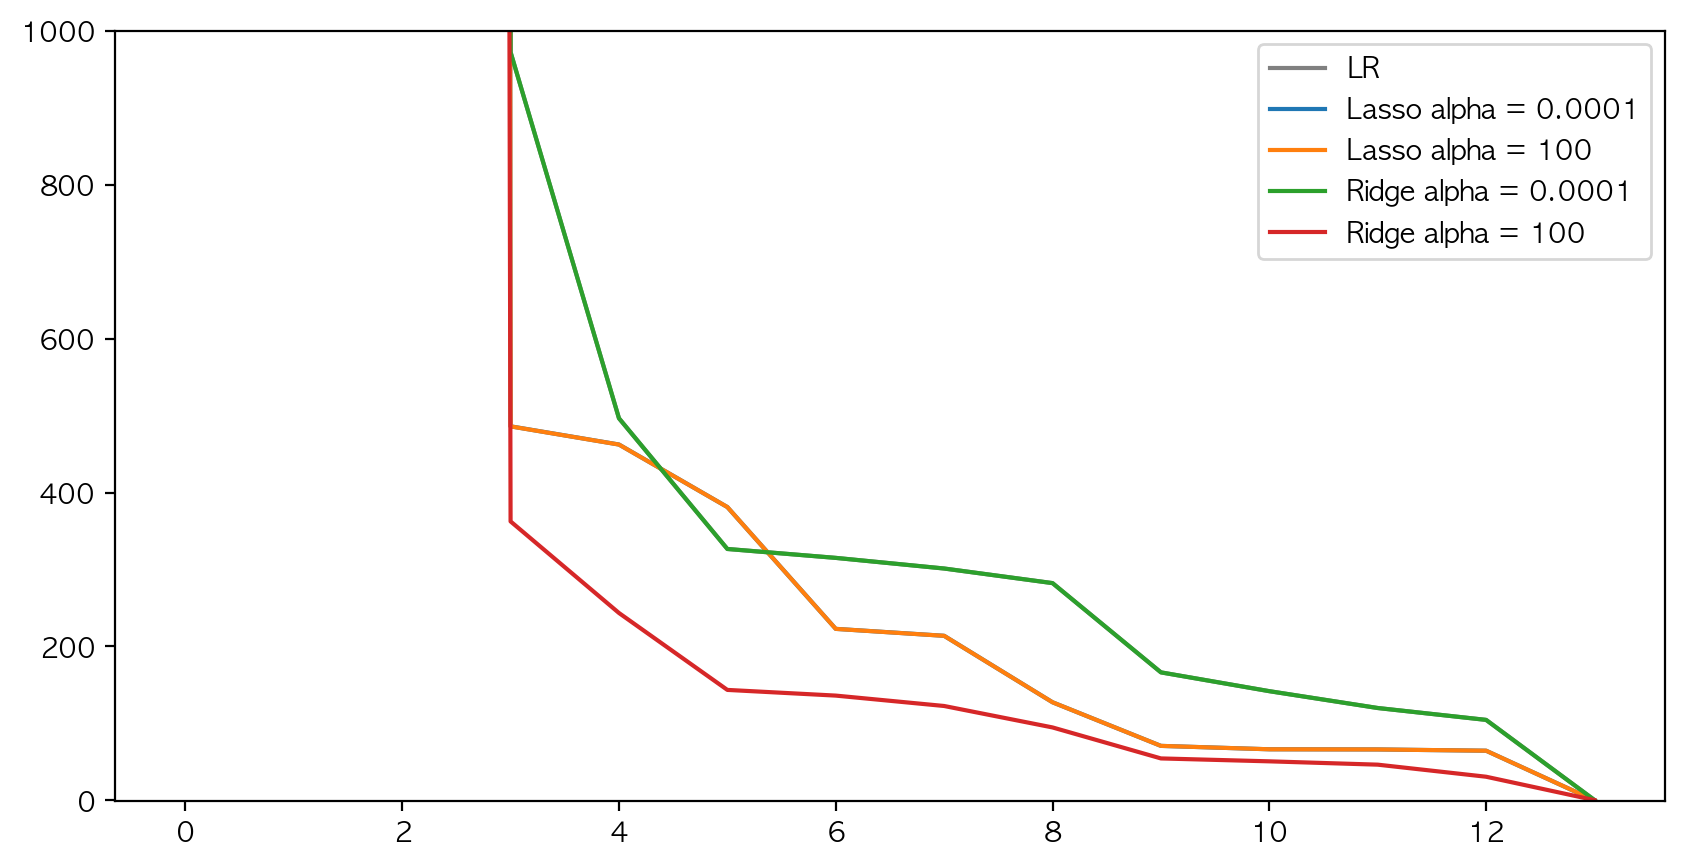

In [351]:
plt.figure(figsize = (10, 5))
plt.plot(sorted(np.abs(model_LR.coef_))[::-1], label = 'LR', c = 'gray')
plt.plot(sorted(np.abs(model_Lasso1.coef_))[::-1], label = 'Lasso alpha = 0.0001')
plt.plot(sorted(np.abs(model_Lasso2.coef_))[::-1], label = 'Lasso alpha = 100')
plt.plot(sorted(np.abs(model_Ridge1.coef_))[::-1], label = 'Ridge alpha = 0.0001')
plt.plot(sorted(np.abs(model_Ridge2.coef_))[::-1], label = 'Ridge alpha = 100')
plt.legend()
plt.ylim((-0.1, 1000))
plt.show()

In [352]:
print(model_Lasso1.coef_)
print(model_Lasso2.coef_)
print(model_Ridge1.coef_)
print(model_Ridge2.coef_)

[ 6.62851396e+01 -4.62343467e+02  6.64974987e+01 -1.27557048e+02
 -2.43133909e+05  1.60939369e+06  3.81116147e+02 -6.46425397e+01
  7.09158551e+01 -4.85970920e+02  2.22900026e+02 -2.13894860e+02
 -1.60134364e+05 -7.99006273e-02]
[ 6.62786339e+01 -4.62263083e+02  6.64882151e+01 -1.27549571e+02
 -2.43122667e+05  1.60911192e+06  3.81124204e+02 -6.46394272e+01
  7.09118406e+01 -4.85894401e+02  2.22871728e+02 -2.13855137e+02
 -1.60078221e+05 -7.99740366e-02]
[ 1.20102623e+02 -9.71957941e+02  1.41966577e+02 -1.66391878e+02
 -1.86286720e+05  2.05796318e+06 -1.04665360e+02 -3.26666396e+02
  3.01278294e+02 -4.96405458e+02 -3.15091516e+02 -2.82324728e+02
 -2.19394050e+05  5.58592720e-01]
[ 5.46119988e+01 -2.43521104e+02  5.08425690e+01 -1.22723271e+02
 -1.21815627e+05  1.27322613e+05  3.62469503e+02 -1.43609583e+02
  1.36221374e+02 -9.48662362e+01 -4.65263580e+01 -3.08504670e+01
  6.19588793e+04 -4.55640040e-01]


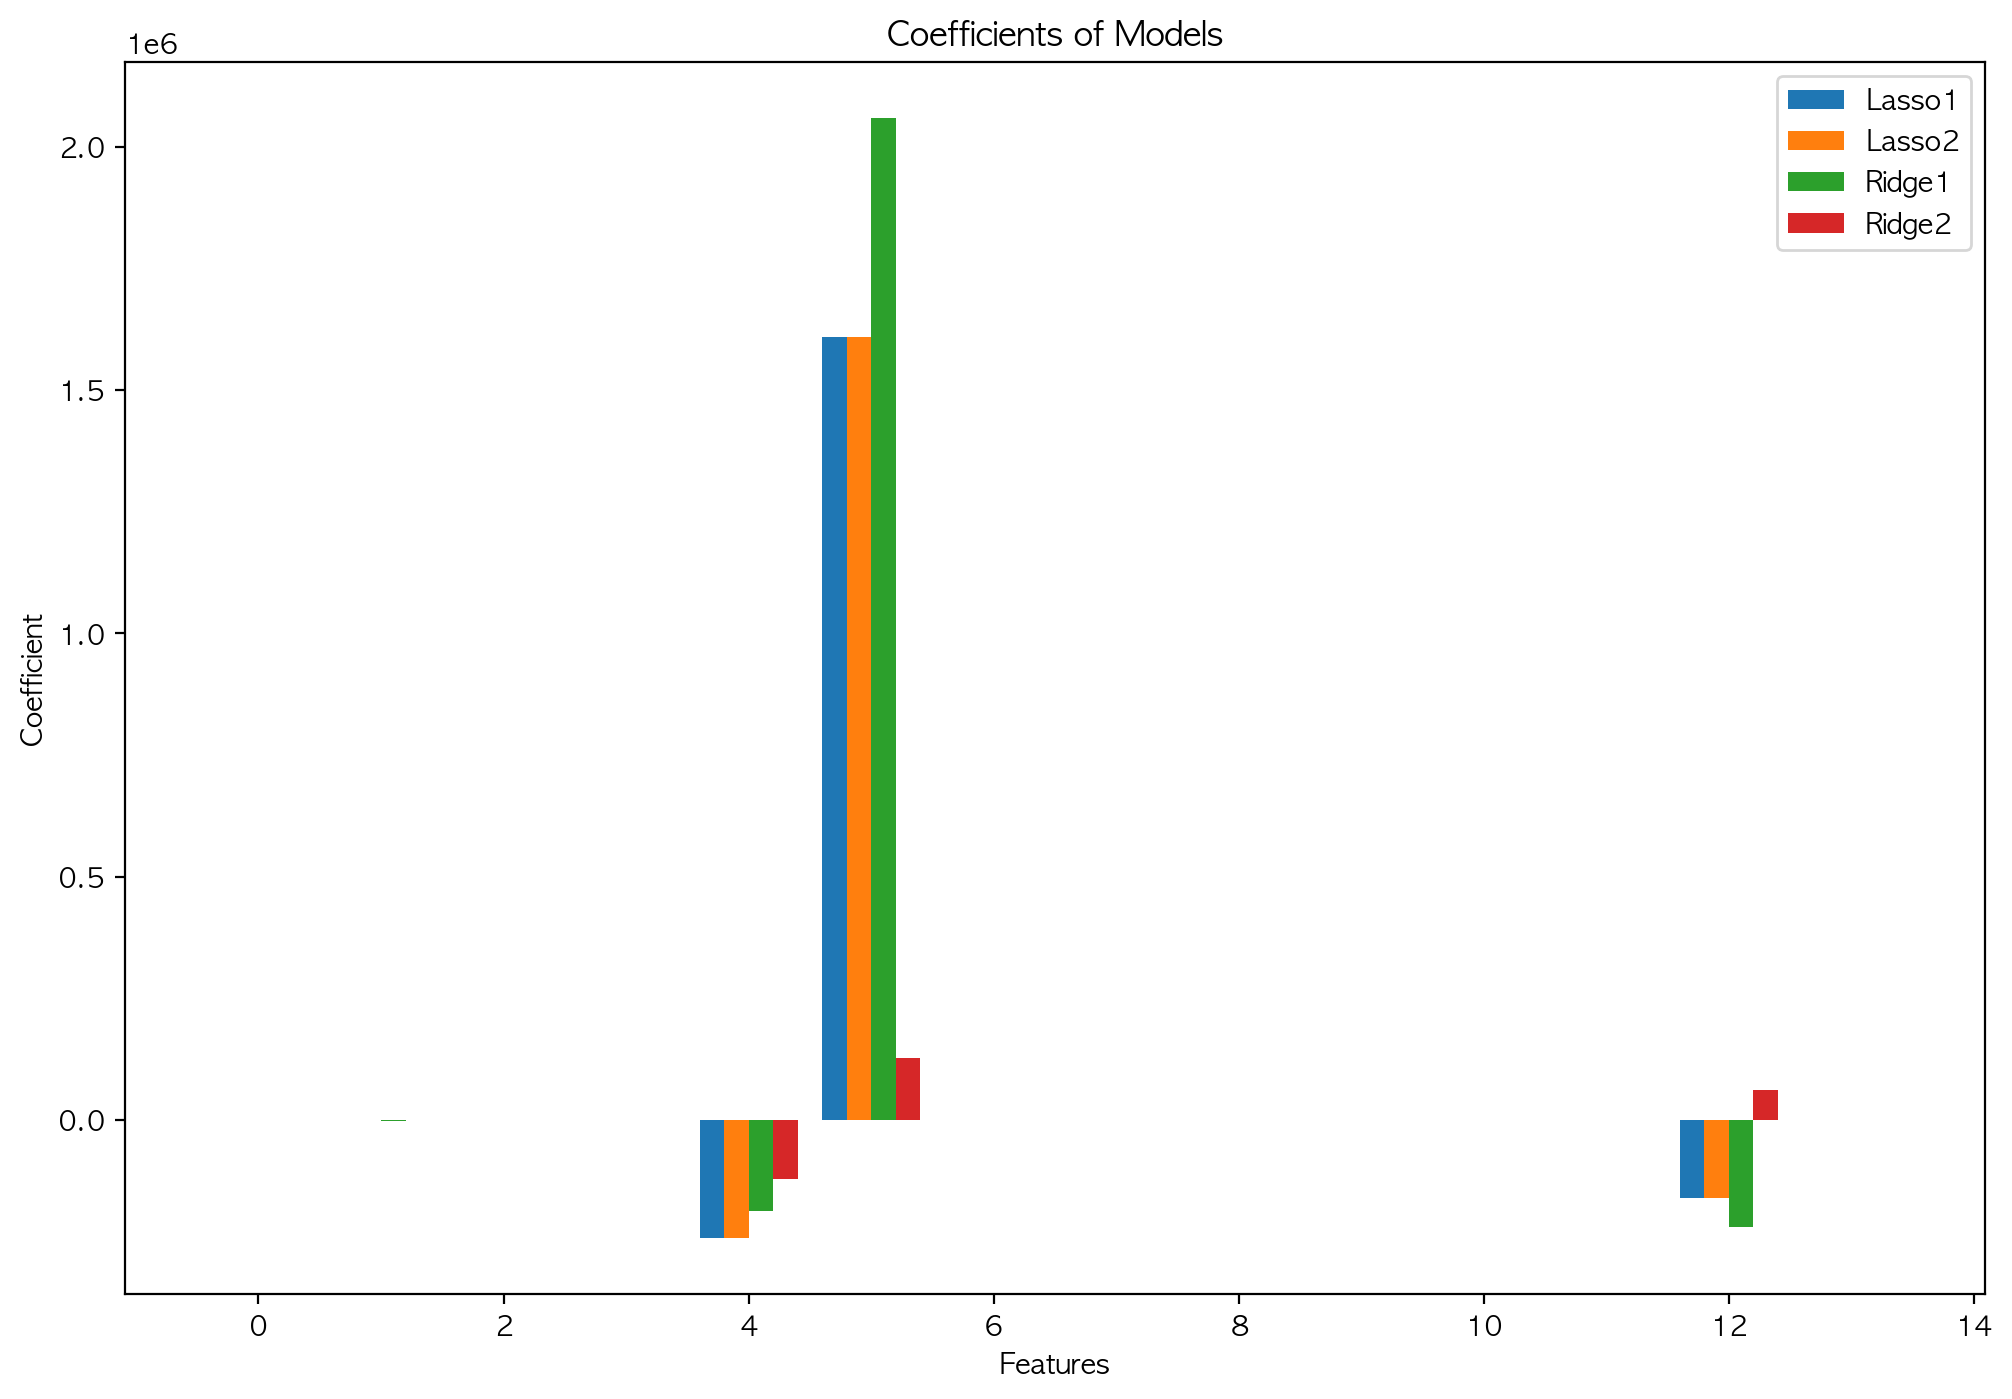

In [353]:
# 계수를 numpy 배열로 변환
coef_Lasso1 = np.array(model_Lasso1.coef_)
coef_Lasso2 = np.array(model_Lasso2.coef_)
coef_Ridge1 = np.array(model_Ridge1.coef_)
coef_Ridge2 = np.array(model_Ridge2.coef_)

# x축 값 설정
x = np.arange(len(coef_Lasso1))

# 막대 그래프 그리기
plt.figure(figsize=(12, 8))
plt.bar(x - 0.3, coef_Lasso1, width=0.2, label='Lasso1')
plt.bar(x - 0.1, coef_Lasso2, width=0.2, label='Lasso2')
plt.bar(x + 0.1, coef_Ridge1, width=0.2, label='Ridge1')
plt.bar(x + 0.3, coef_Ridge2, width=0.2, label='Ridge2')

# 그래프 제목과 레이블 설정
plt.title('Coefficients of Models')
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.legend()

# 그래프 표시
plt.show()

In [354]:
# 특성 이름 출력
print(X.columns)

Index(['소속구', '인구수', '사업체수(개)', '종사자수(명)', '자동차 등록대수', '지하철역 개수', '대학교',
       '시간당 평균 지하철 이용객 수', '지역별 자동차 이동량(IN)', '지역별 자동차 이동량(OUT)', '고등학생 수',
       '중학생 수', '대학생수', '면적', '월 총 지하철 이용객 수'],
      dtype='object')


In [358]:
def plot_coef(columns, coef):
    coef_df = pd.DataFrame(list(zip(columns, coef)))
    coef_df.columns = ['feature', 'coef']
    coef_df = coef_df.sort_values('coef', ascending=False).reset_index(drop=True)

    fig, ax = plt.subplots(figsize=(9, 7))
    ax.barh(np.arange(len(coef_df)), coef_df['coef'])
    idx = np.arange(len(coef_df))
    ax.set_yticks(idx)
    ax.set_yticklabels(coef_df['feature'])
    fig.tight_layout()
    plt.show()


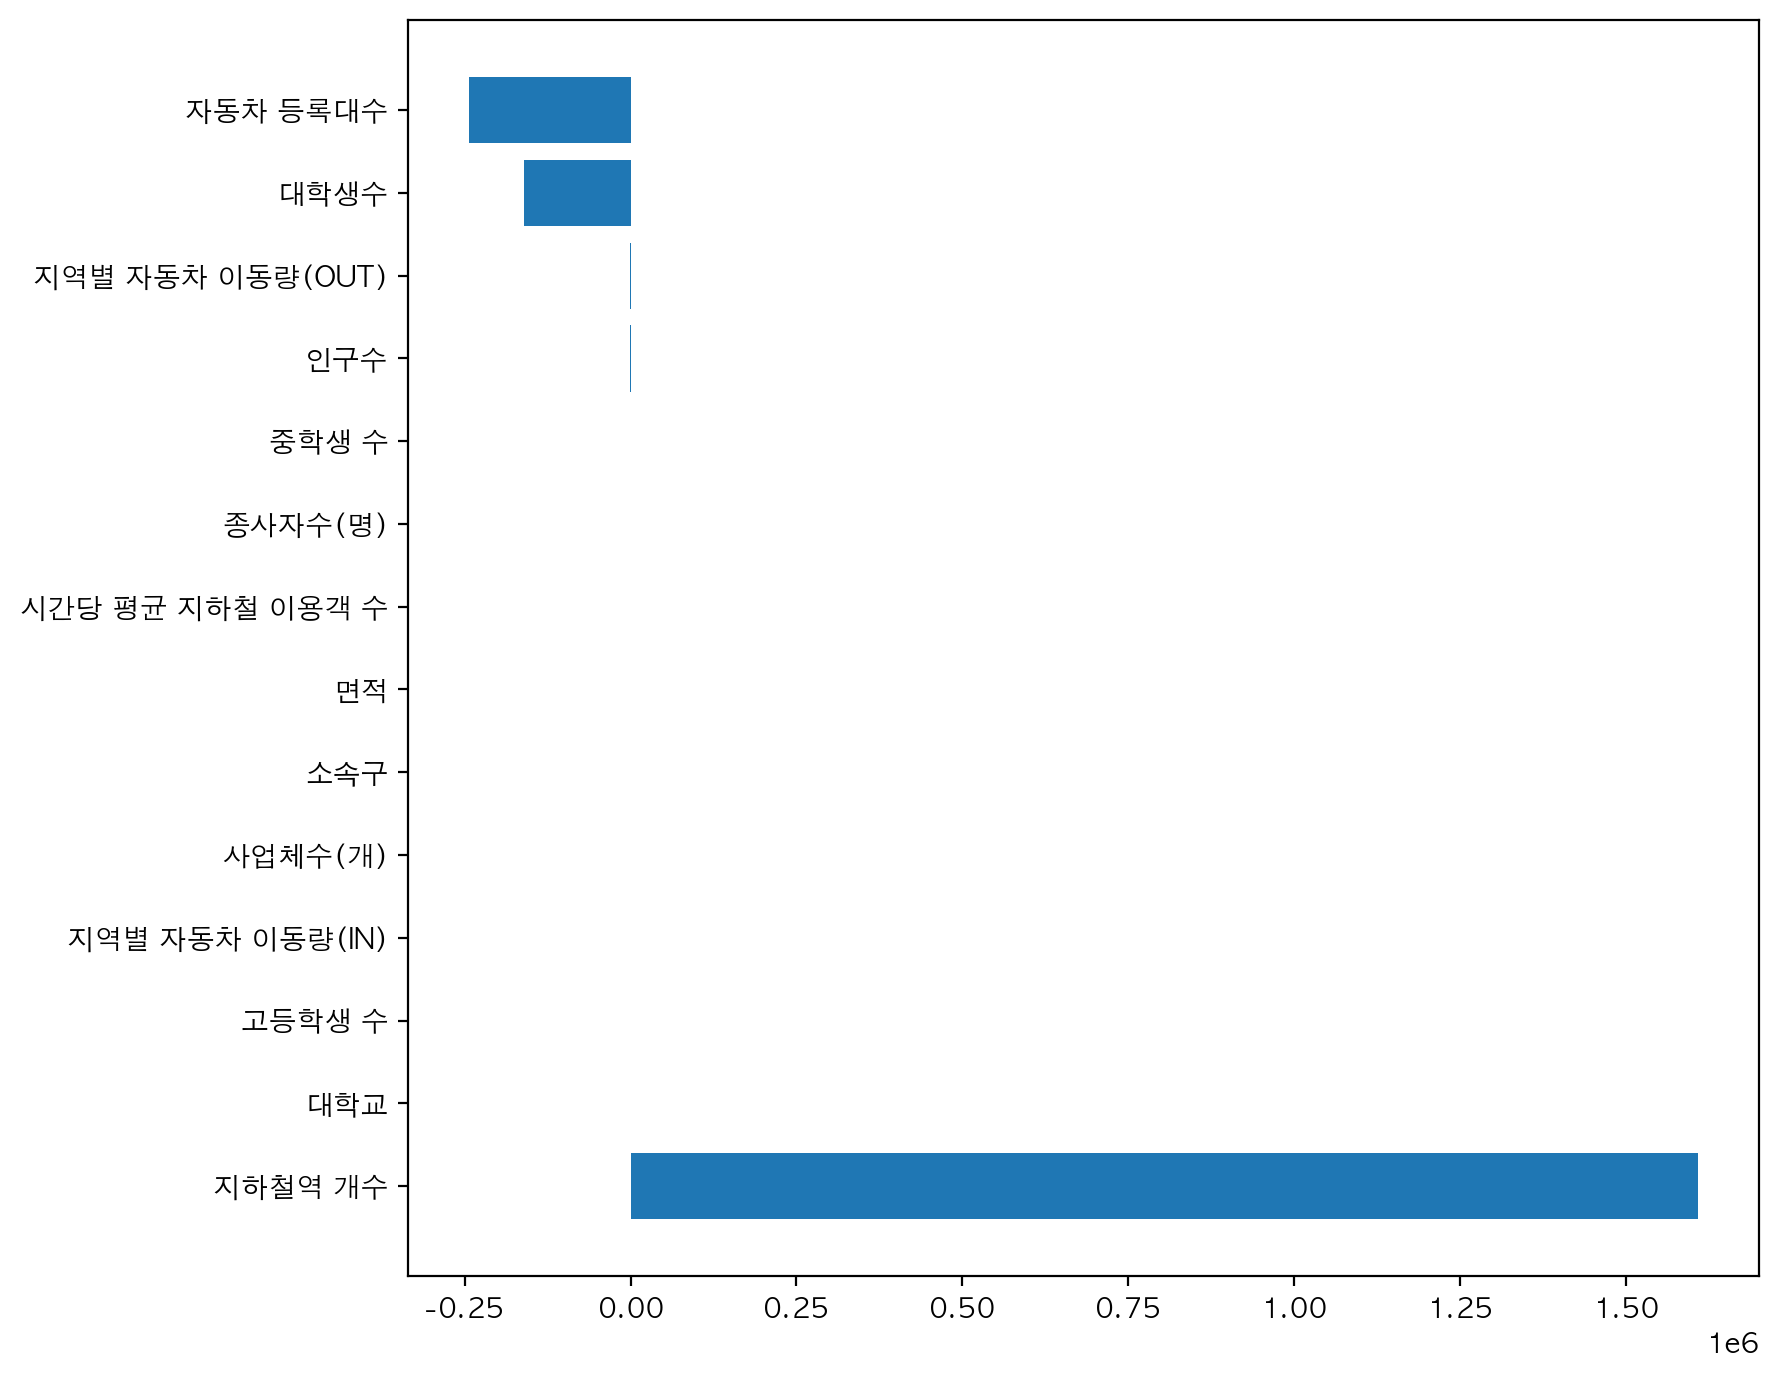

array([ 6.62786339e+01, -4.62263083e+02,  6.64882151e+01, -1.27549571e+02,
       -2.43122667e+05,  1.60911192e+06,  3.81124204e+02, -6.46394272e+01,
        7.09118406e+01, -4.85894401e+02,  2.22871728e+02, -2.13855137e+02,
       -1.60078221e+05, -7.99740366e-02])

In [359]:
lasso_100 = Lasso(alpha=100)
lasso_100.fit(X_train, y_train)
lasso_pred_100 = lasso_100.predict(X_test)

plot_coef(X.columns, lasso_100.coef_)
lasso_100.coef_

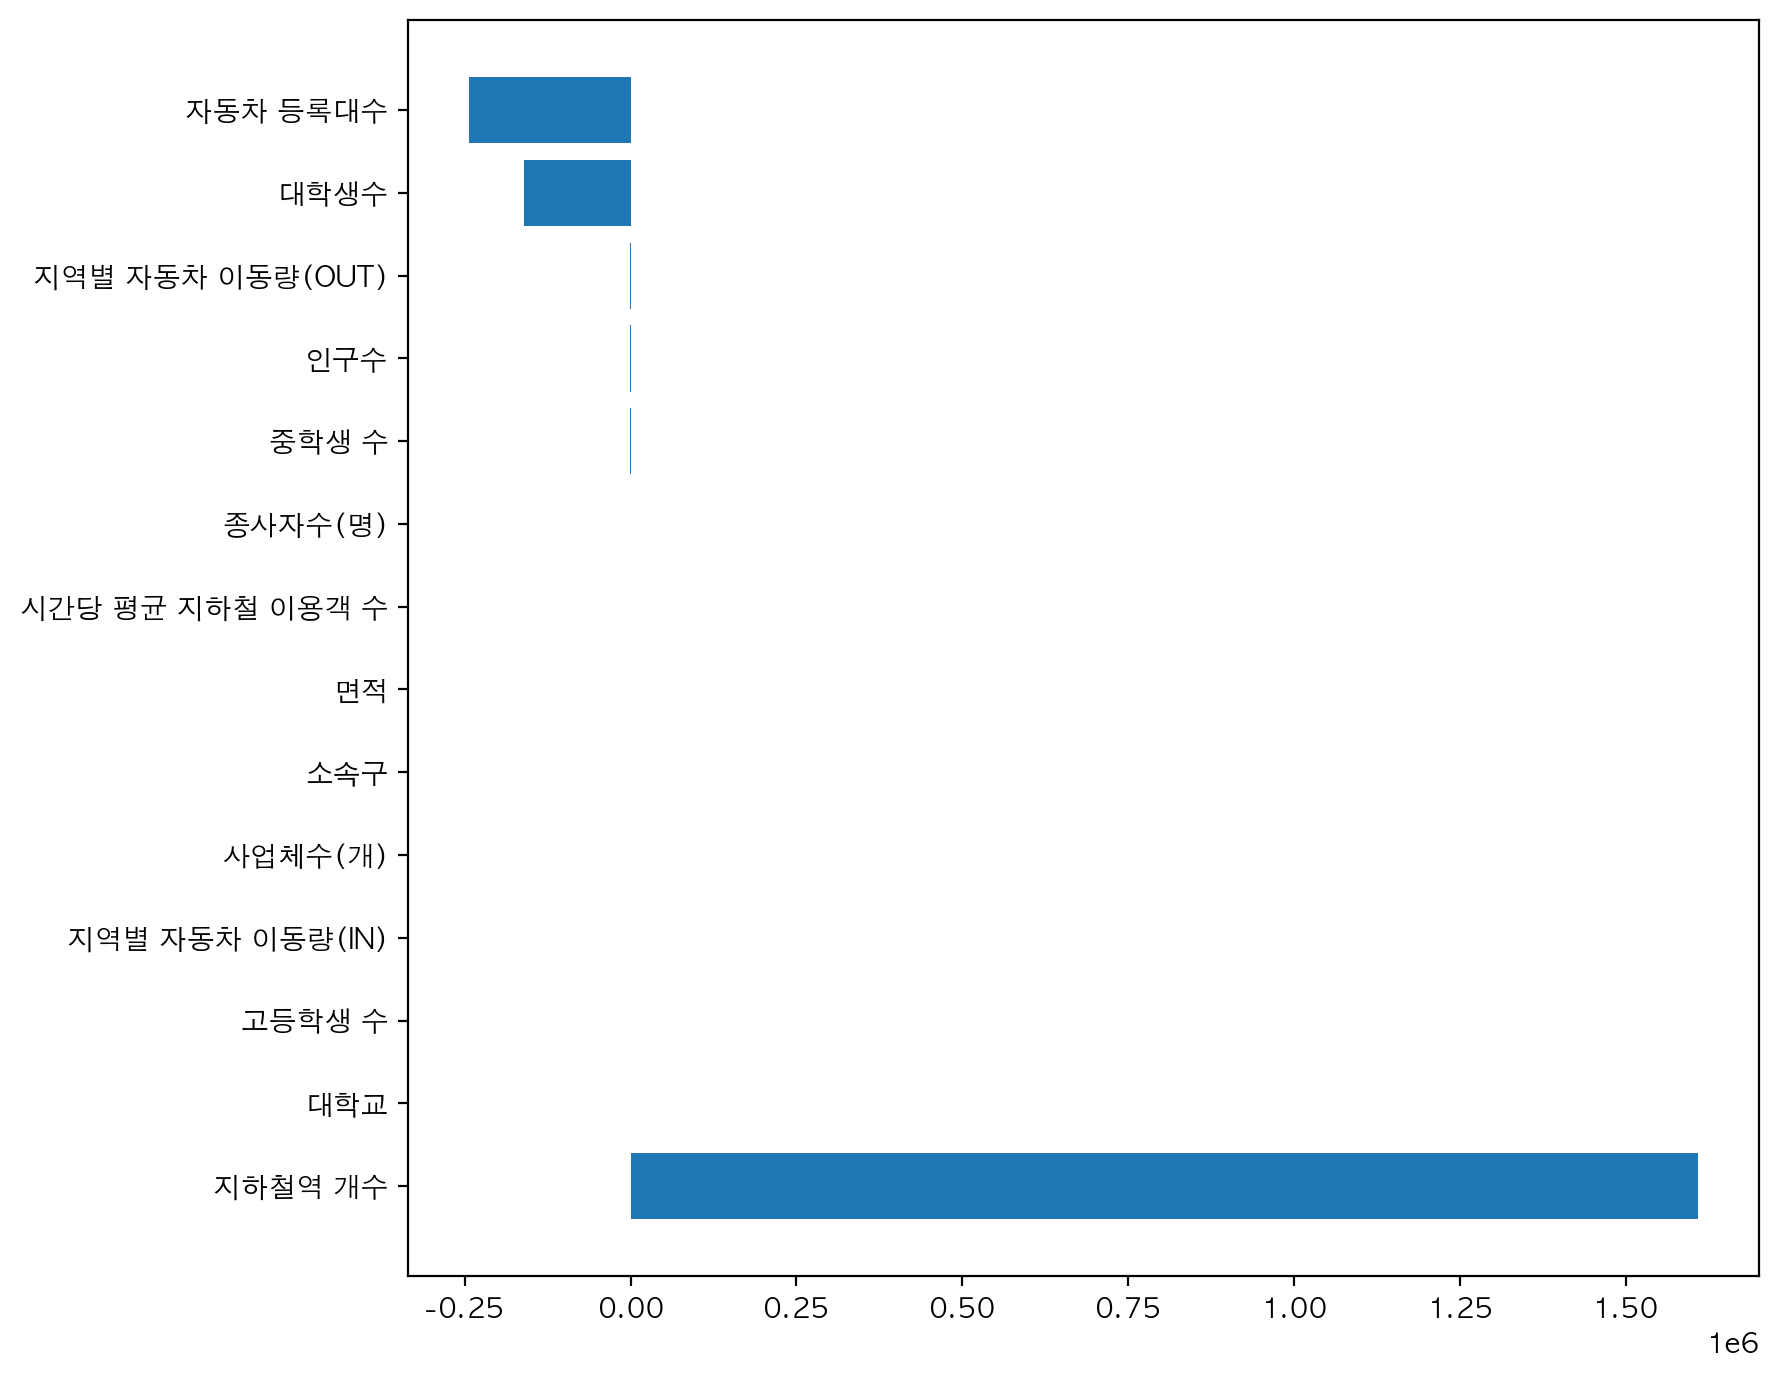

array([ 6.62851395e+01, -4.62343466e+02,  6.64974986e+01, -1.27557048e+02,
       -2.43133909e+05,  1.60939369e+06,  3.81116147e+02, -6.46425397e+01,
        7.09158550e+01, -4.85970919e+02,  2.22900026e+02, -2.13894860e+02,
       -1.60134364e+05, -7.99006280e-02])

In [360]:
lasso_001 = Lasso(alpha=0.001)
lasso_001.fit(X_train, y_train)
lasso_pred_001 = lasso_001.predict(X_test)

plot_coef(X.columns, lasso_001.coef_)
lasso_001.coef_

In [361]:
# alpha 값의 후보 리스트 지정
alphas = [0.01, 0.1, 1, 10]

# LassoCV 모델 생성
lasso_cv = LassoCV(alphas=alphas, cv=5)  # cv는 교차 검증의 폴드(fold) 수를 나타냄

# 모델 훈련
lasso_cv.fit(X_train, y_train)

# 최적의 alpha 값 출력
print("Optimal alpha:", lasso_cv.alpha_)

Optimal alpha: 10.0


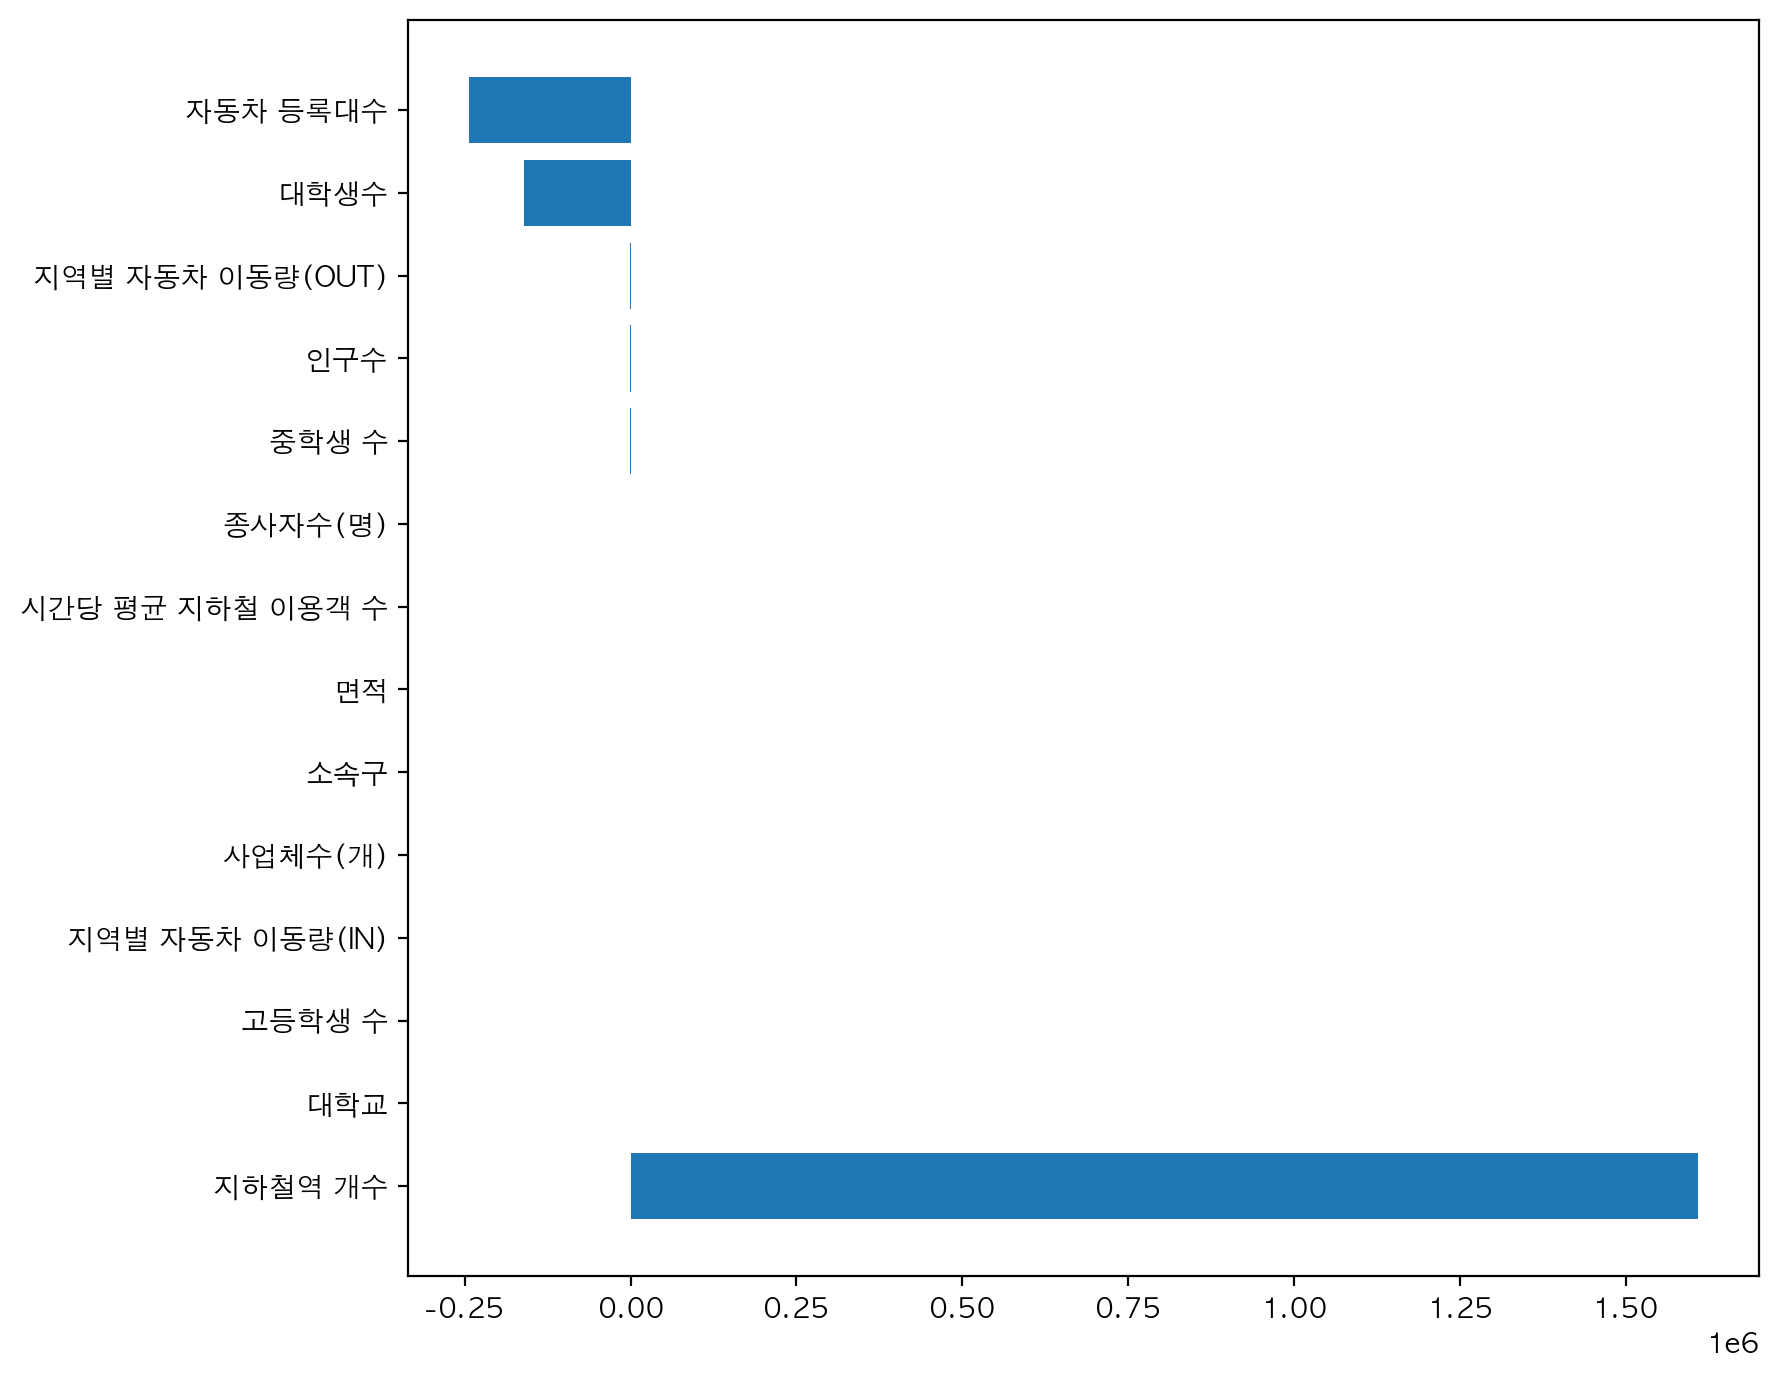

array([ 6.62844890e+01, -4.62335429e+02,  6.64965703e+01, -1.27556300e+02,
       -2.43132785e+05,  1.60936551e+06,  3.81116953e+02, -6.46422285e+01,
        7.09154536e+01, -4.85963268e+02,  2.22897196e+02, -2.13890888e+02,
       -1.60128750e+05, -7.99079682e-02])

In [362]:
lasso_10 = Lasso(alpha=10)
lasso_10.fit(X_train, y_train)
lasso_pred_10 = lasso_10.predict(X_test)

plot_coef(X.columns, lasso_10.coef_)
lasso_10.coef_

# 정체유발 구 추가 (통행시간거리지표 평균통행속력)

In [363]:
df_all_speed = df_all.copy()
df_all_speed['정체유발 구'] = df_all_speed['소속구'].apply(lambda x: 1 if x in ['강북구', '두봉구','동대문구','서대문구', '성북구', '양천구', '연평구','중랑구'] else 0)
df_all_speed

,소속구,인구수,사업체수(개),종사자수(명),자동차 등록대수,지하철역 개수,대학교,시간당 평균 지하철 이용객 수,지역별 자동차 이동량(IN),지역별 자동차 이동량(OUT),고등학생 수,중학생 수,대학생수,면적,월 총 버스 이용객 수,월 총 지하철 이용객 수,정체유발 구
0,강남구,487153,108512,800269,253856,21,1.0,56658,476930,503086,17403,16500,NaN,39.50,1.717323e+07,3.584361e+07,0
1,강동구,438900,37242,153049,154020,14,NaN,14479,189777,184318,10839,10946,NaN,24.59,5.955631e+06,9.013447e+06,0
2,강북구,279828,23706,77529,74549,3,1.0,9398,81393,70290,5120,5696,3151,23.60,9.742048e+06,5.966186e+06,1
3,강서구,543655,52865,283547,205821,9,2.0,25904,258611,252385,13149,10312,2479,41.45,9.476828e+06,1.438899e+07,0
4,관악구,470221,34064,124560,118303,4,1.0,15447,155379,145935,8478,6314,20507,29.57,1.511914e+07,9.950634e+06,0
5,광진구,324047,31751,127761,97627,11,3.0,17936,148779,150575,7253,6674,39461,17.06,5.807374e+06,1.141278e+07,0
6,구로구,378227,48818,236487,147818,7,3.0,22006,148435,148427,8817,7889,13398,20.12,1.026499e+07,1.357861e+07,0
7,금천구,220466,45848,253100,92139,1,NaN,7439,107555,105833,3726,3631,NaN,13.02,7.421641e+06,4.890644e+06,0
8,노원구,486285,32069,127564,152510,13,7.0,18645,173485,179853,17140,13782,50403,35.44,8.635064e+06,1.152272e+07,0
9,도봉구,298358,20746,74516,95127,3,1.0,8198,83870,75120,5906,5839,6507,20.65,6.705999e+06,5.229198e+06,0


<Axes: >

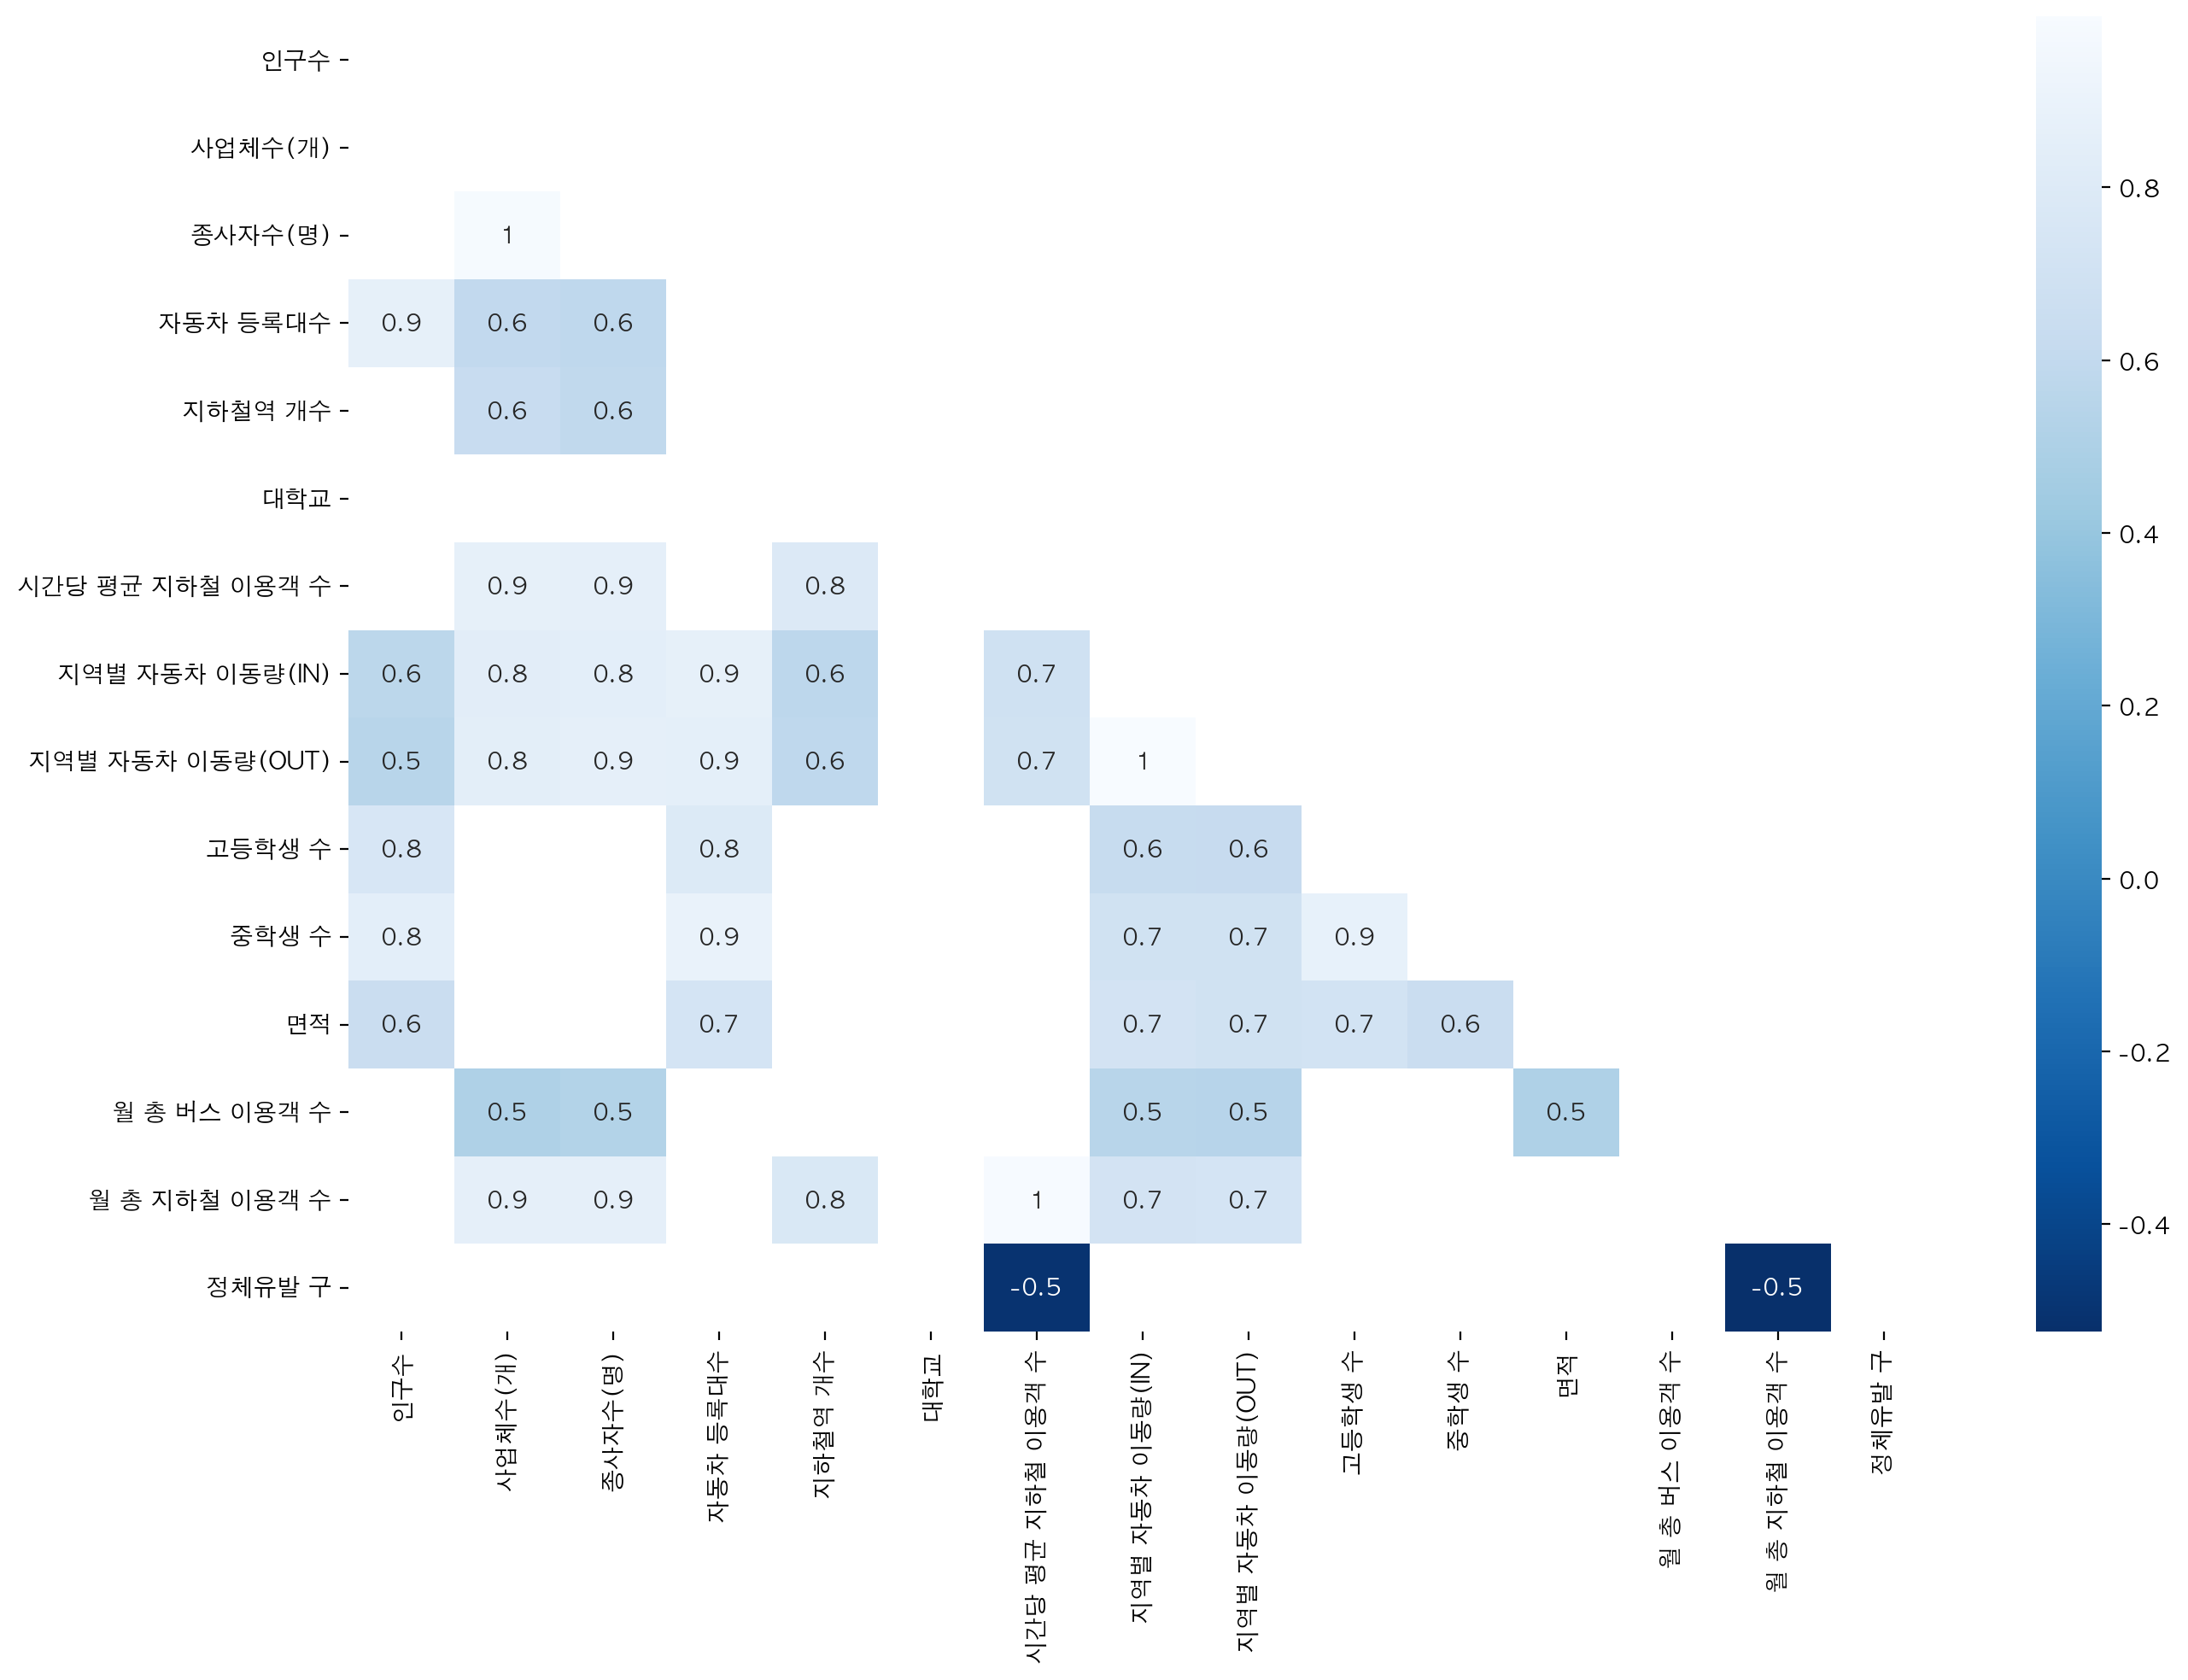

In [364]:
num_cols = df_all_speed.select_dtypes(include=[np.number]).columns
corr = df_all_speed[num_cols].corr()
mask = np.triu(np.ones_like(corr))

plt.figure(figsize = [15,10])
sns.heatmap(corr[np.abs(corr) > 0.5],annot = True, mask = mask, cmap = 'Blues_r', fmt = '.1g')

In [320]:
X = df_all.drop('정체유발 구', axis=1)
y = df_all['정체유발 구']

display(X.head(3))

,소속구,인구수,사업체수(개),종사자수(명),자동차 등록대수,지하철역 개수,대학교,시간당 평균 지하철 이용객 수,지역별 자동차 이동량(IN),지역별 자동차 이동량(OUT),고등학생 수,중학생 수,대학생수,면적,월 총 버스 이용객 수,월 총 지하철 이용객 수
0,강남구,487153,108512,800269,253856,21,1.0,56658,476930,503086,17403,16500,NaN,39.50,1.717323e+07,3.584361e+07
1,강동구,438900,37242,153049,154020,14,NaN,14479,189777,184318,10839,10946,NaN,24.59,5.955631e+06,9.013447e+06
2,강북구,279828,23706,77529,74549,3,1.0,9398,81393,70290,5120,5696,3151,23.60,9.742048e+06,5.966186e+06


In [321]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2021)

In [322]:
NaNinfo = X_train.isnull().sum()
NaNinfo = NaNinfo.sort_values(ascending = False)
NaNinfo = NaNinfo[NaNinfo > 0]
NaNinfo

대학생수    5
대학교     4
dtype: int64

In [323]:
for feature in ['대학생수', '대학교']:
    X_train[feature] = X_train[feature].fillna(X_train[feature].mean())
    X_test[feature] = X_test[feature].fillna(X_train[feature].mean())

In [324]:
category = list(X_train.select_dtypes(include = [object]))
category[:10]

['소속구']

In [325]:
X_train = X_train.set_index('소속구')
X_train

,인구수,사업체수(개),종사자수(명),자동차 등록대수,지하철역 개수,대학교,시간당 평균 지하철 이용객 수,지역별 자동차 이동량(IN),지역별 자동차 이동량(OUT),고등학생 수,중학생 수,대학생수,면적,월 총 버스 이용객 수,월 총 지하철 이용객 수
소속구,,,,,,,,,,,,,,,
종로구,133947,47580,275007,50768,15,6.000000,28891,113175,121313,7365,2481,27338.000000,23.91,1.152076e+07,1.781277e+07
강북구,279828,23706,77529,74549,3,1.000000,9398,81393,70290,5120,5696,3151.000000,23.60,9.742048e+06,5.966186e+06
서초구,373217,71228,487149,177103,12,3.000000,24763,335622,346825,9342,11538,2464.000000,46.97,1.287987e+07,1.553619e+07
영등포구,356314,71666,431292,144663,11,2.769231,26215,295161,301272,5467,6257,19500.083333,24.55,1.215898e+07,1.710700e+07
성동구,269462,39582,200788,104416,14,2.000000,18358,147239,150923,3648,4339,30114.000000,16.82,5.848014e+06,1.139634e+07
금천구,220466,45848,253100,92139,1,2.769231,7439,107555,105833,3726,3631,19500.083333,13.02,7.421641e+06,4.890644e+06
광진구,324047,31751,127761,97627,11,3.000000,17936,148779,150575,7253,6674,39461.000000,17.06,5.807374e+06,1.141278e+07
강동구,438900,37242,153049,154020,14,2.769231,14479,189777,184318,10839,10946,19500.083333,24.59,5.955631e+06,9.013447e+06
송파구,621266,69561,395719,244299,28,1.000000,31385,360946,368371,13735,15971,2992.000000,33.88,1.161241e+07,1.908248e+07


In [326]:
X_test = X_test.set_index('소속구')
X_train_final = X_train
X_test_final = X_test
X_train, y_train = X_train.values, y_train.values
X_test, y_test = X_test.values, y_test.values

In [327]:
# 모델 학습
model_LR = LinearRegression(n_jobs = -1)
model_LR.fit(X_train, y_train)

# 계수 출력
display(pd.DataFrame(model_LR.coef_,
    index = X_test_final.columns, columns = ['Linear regression 계수']))

,Linear regression 계수
인구수,-2.113670e-05
사업체수(개),1.730236e-04
종사자수(명),-2.728609e-05
자동차 등록대수,1.867888e-05
지하철역 개수,7.972897e-03
대학교,-4.317973e-01
시간당 평균 지하철 이용객 수,1.956170e-04
지역별 자동차 이동량(IN),5.246112e-05
지역별 자동차 이동량(OUT),-4.534774e-05
고등학생 수,-4.722695e-05


In [330]:
# alpha 값의 후보 리스트 지정
alphas = [0.01, 0.1, 1, 10]

# LassoCV 모델 생성
lasso_cv = LassoCV(alphas=alphas, cv=5)  # cv는 교차 검증의 폴드(fold) 수를 나타냄

# 모델 훈련
lasso_cv.fit(X_train, y_train)

# 최적의 alpha 값 출력
print("Optimal alpha:", lasso_cv.alpha_)

Optimal alpha: 10.0


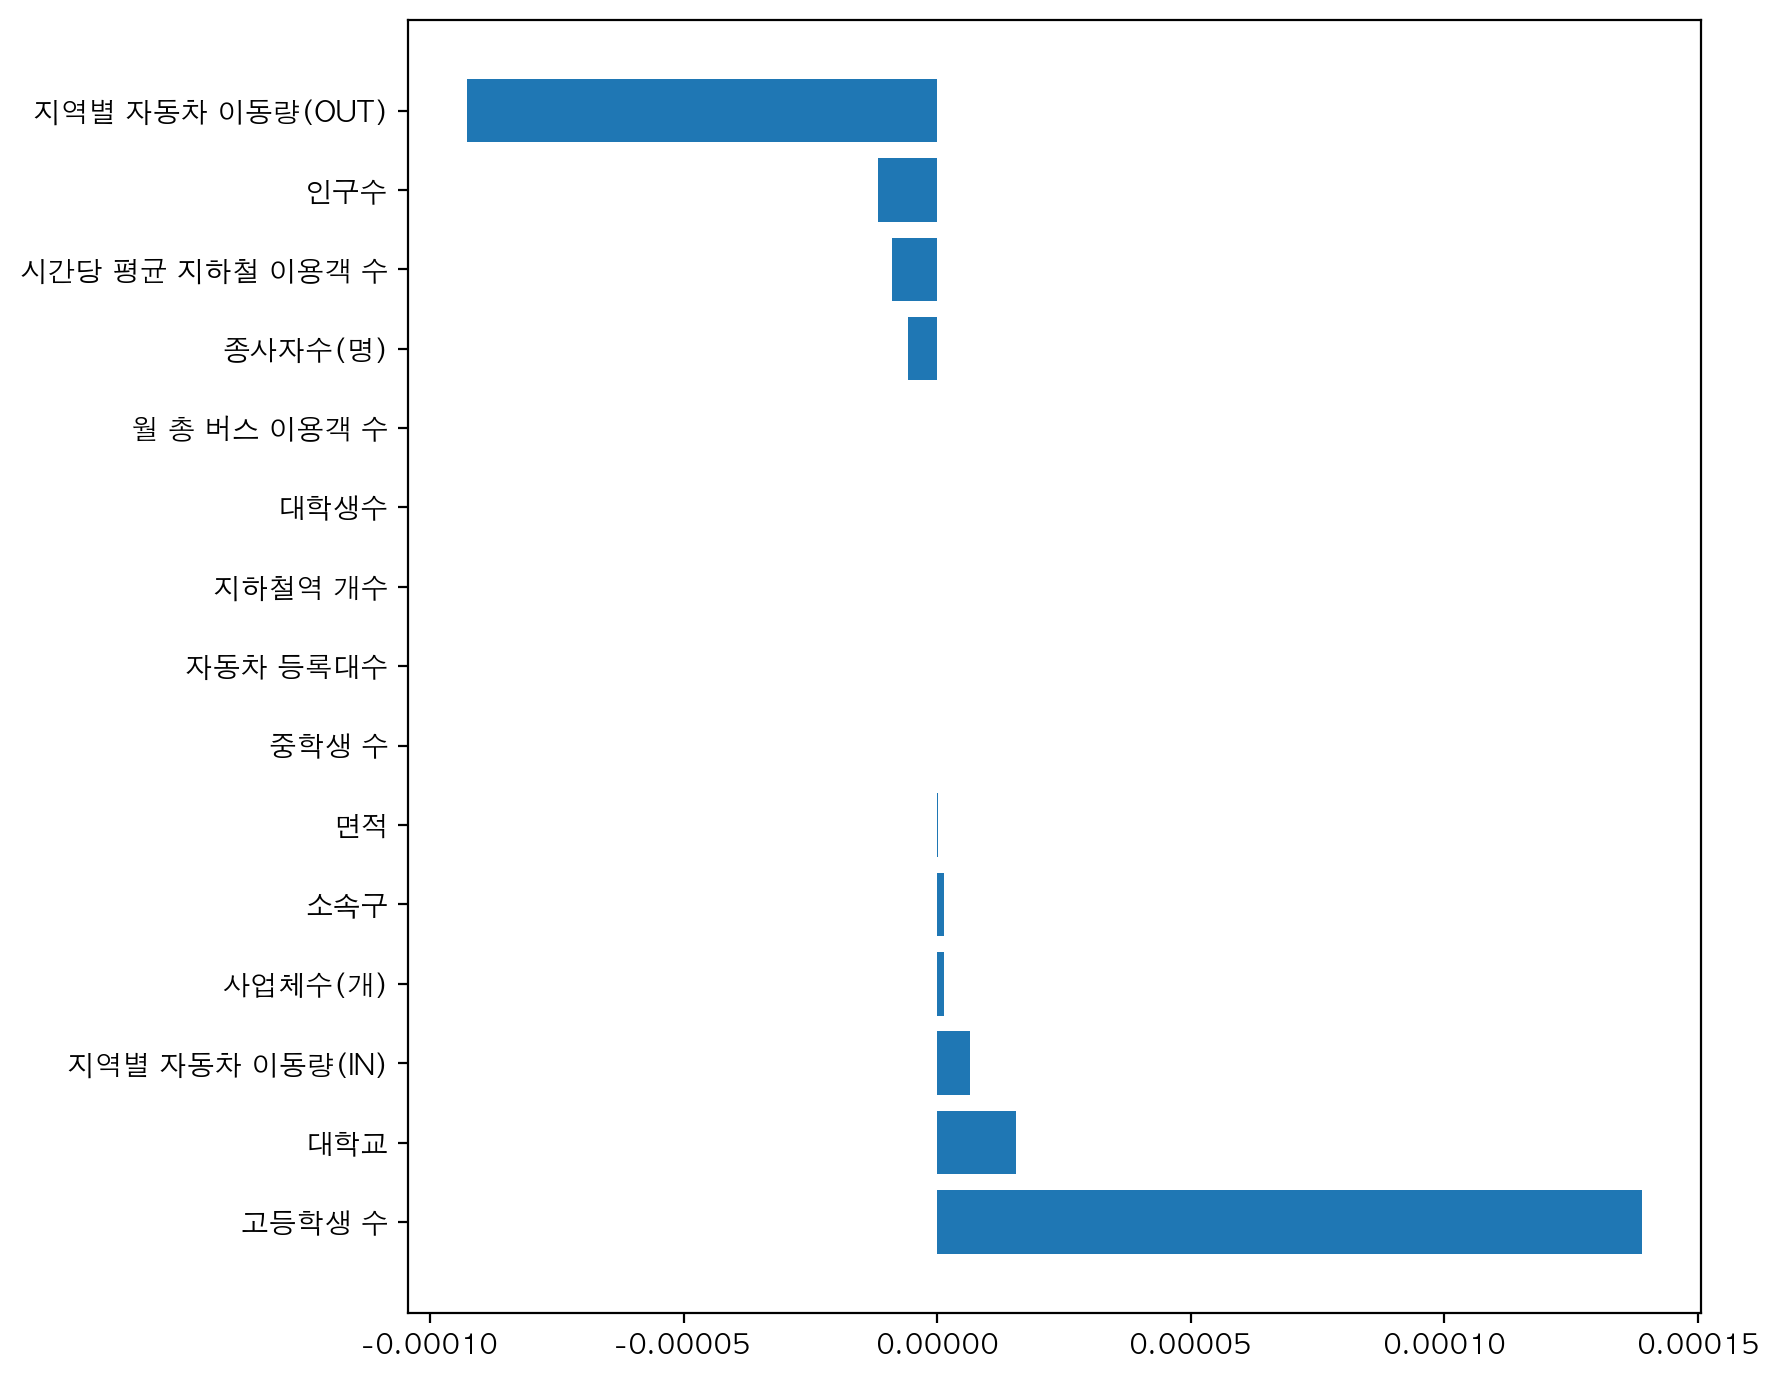

array([ 1.27394452e-06, -1.16033027e-05,  1.31428422e-06, -5.74426990e-06,
       -0.00000000e+00, -0.00000000e+00,  1.55742925e-05, -8.99920691e-06,
        6.50956952e-06, -9.27464655e-05,  1.39014105e-04,  5.95827862e-08,
       -0.00000000e+00,  8.67867854e-08, -4.18988778e-08])

In [332]:
lasso_10 = Lasso(alpha=10)
lasso_10.fit(X_train, y_train)
lasso_pred_10 = lasso_10.predict(X_test)

plot_coef(X.columns, lasso_10.coef_)
lasso_10.coef_

# 좋은 구를 기준으로

In [366]:
df_all_good = df_all.copy()
df_all_good['정체없는 구'] = df_all_good['소속구'].apply(lambda x: 1 if x in ['송파구', '광진구'] else 0)
df_all_good

,소속구,인구수,사업체수(개),종사자수(명),자동차 등록대수,지하철역 개수,대학교,시간당 평균 지하철 이용객 수,지역별 자동차 이동량(IN),지역별 자동차 이동량(OUT),고등학생 수,중학생 수,대학생수,면적,월 총 버스 이용객 수,월 총 지하철 이용객 수,정체없는 구
0,강남구,487153,108512,800269,253856,21,1.0,56658,476930,503086,17403,16500,NaN,39.50,1.717323e+07,3.584361e+07,0
1,강동구,438900,37242,153049,154020,14,NaN,14479,189777,184318,10839,10946,NaN,24.59,5.955631e+06,9.013447e+06,0
2,강북구,279828,23706,77529,74549,3,1.0,9398,81393,70290,5120,5696,3151,23.60,9.742048e+06,5.966186e+06,0
3,강서구,543655,52865,283547,205821,9,2.0,25904,258611,252385,13149,10312,2479,41.45,9.476828e+06,1.438899e+07,0
4,관악구,470221,34064,124560,118303,4,1.0,15447,155379,145935,8478,6314,20507,29.57,1.511914e+07,9.950634e+06,0
5,광진구,324047,31751,127761,97627,11,3.0,17936,148779,150575,7253,6674,39461,17.06,5.807374e+06,1.141278e+07,1
6,구로구,378227,48818,236487,147818,7,3.0,22006,148435,148427,8817,7889,13398,20.12,1.026499e+07,1.357861e+07,0
7,금천구,220466,45848,253100,92139,1,NaN,7439,107555,105833,3726,3631,NaN,13.02,7.421641e+06,4.890644e+06,0
8,노원구,486285,32069,127564,152510,13,7.0,18645,173485,179853,17140,13782,50403,35.44,8.635064e+06,1.152272e+07,0
9,도봉구,298358,20746,74516,95127,3,1.0,8198,83870,75120,5906,5839,6507,20.65,6.705999e+06,5.229198e+06,0


<Axes: >

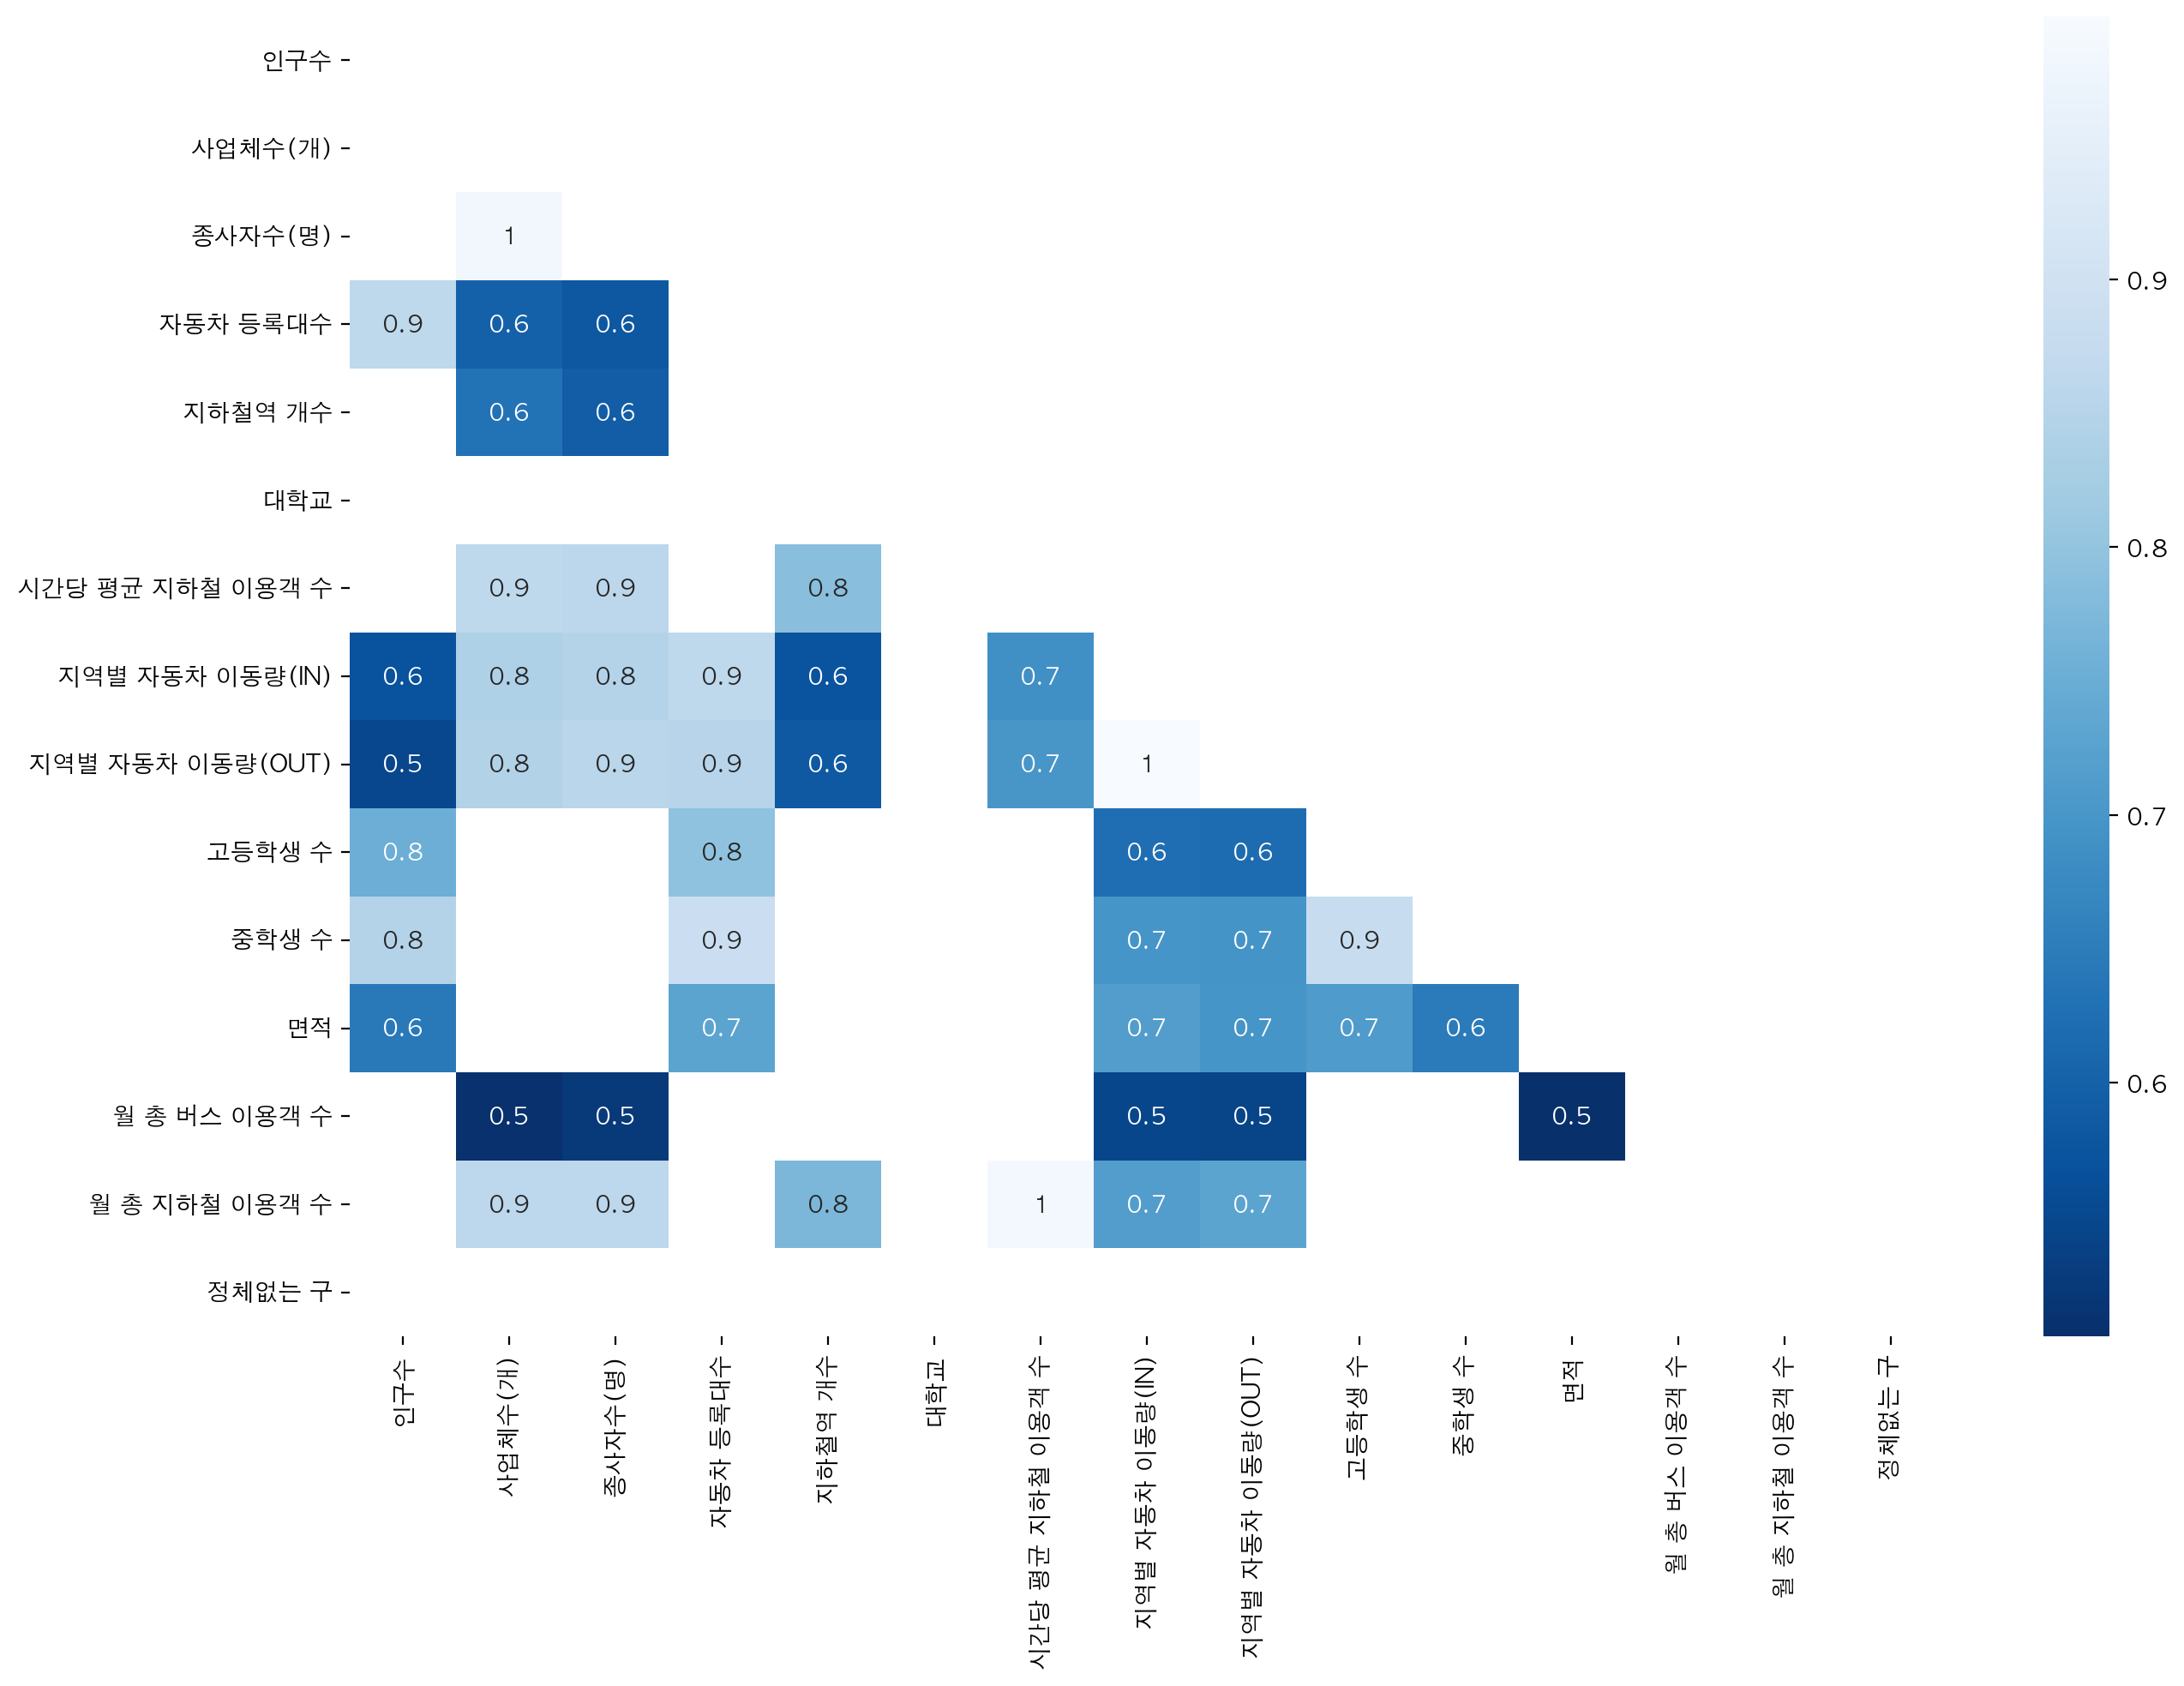

In [367]:
num_cols = df_all_good.select_dtypes(include=[np.number]).columns
corr = df_all_good[num_cols].corr()
mask = np.triu(np.ones_like(corr))

plt.figure(figsize = [15,10])
sns.heatmap(corr[np.abs(corr) > 0.5],annot = True, mask = mask, cmap = 'Blues_r', fmt = '.1g')